In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [6]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [7]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [8]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [9]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [10]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
sensor2 = sensor2.reshape(41, 16, 1)

In [14]:
sensor3 = sensor3.reshape(41, 16, 1)

In [15]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [16]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [17]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [18]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [19]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 8ms/step - loss: 0.8234 - rmse: 0.9006
Epoch 2/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8254 - rmse: 0.9017
Epoch 3/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8271 - rmse: 0.9027
Epoch 4/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8239 - rmse: 0.9010
Epoch 5/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8188 - rmse: 0.8981
Epoch 6/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8171 - rmse: 0.8972
Epoch 7/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8239 - rmse: 0.9010
Epoch 8/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8187 - rmse: 0.8981
Epoch 9/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8114 - rmse: 0.8940
Epoch 10/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8102 - rmse: 0.8933
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 7ms/step - loss: 0.6709 - rmse: 0.8118
Epoch 87/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6679 - rmse: 0.8100
Epoch 88/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6667 - rmse: 0.8092
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6627 - rmse: 0.8068
Epoch 90/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6594 - rmse: 0.8047
Epoch 91/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6628 - rmse: 0.8068
Epoch 92/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6630 - rmse: 0.8069
Epoch 93/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6533 - rmse: 0.8009
Epoch 94/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6490 - rmse: 0.7982
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6493 - rmse: 0.7984
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 7ms/step - loss: 0.4818 - rmse: 0.6858
Epoch 171/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4861 - rmse: 0.6888
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4786 - rmse: 0.6834
Epoch 173/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4802 - rmse: 0.6846
Epoch 174/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4749 - rmse: 0.6807
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4786 - rmse: 0.6834
Epoch 176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4774 - rmse: 0.6826
Epoch 177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4808 - rmse: 0.6851
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4750 - rmse: 0.6808
Epoch 179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4744 - rmse: 0.6803
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.4122 - rmse: 0.6332
Epoch 255/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4129 - rmse: 0.6338
Epoch 256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4112 - rmse: 0.6324
Epoch 257/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4156 - rmse: 0.6359
Epoch 258/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4093 - rmse: 0.6309
Epoch 259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4118 - rmse: 0.6329
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4079 - rmse: 0.6298
Epoch 261/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4112 - rmse: 0.6324
Epoch 262/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4067 - rmse: 0.6288
Epoch 263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4104 - rmse: 0.6318
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 11ms/step - loss: 0.3551 - rmse: 0.5866
Epoch 339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3547 - rmse: 0.5863
Epoch 340/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3536 - rmse: 0.5853
Epoch 341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3524 - rmse: 0.5843
Epoch 342/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3560 - rmse: 0.5874
Epoch 343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3551 - rmse: 0.5866
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3516 - rmse: 0.5836
Epoch 345/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3493 - rmse: 0.5816
Epoch 346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3493 - rmse: 0.5817
Epoch 347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3491 - rmse: 0.5815
Epoch 348/10000
2/2 [===================

2/2 [==============================] - 0s 11ms/step - loss: 0.3061 - rmse: 0.5435
Epoch 423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3062 - rmse: 0.5436
Epoch 424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3059 - rmse: 0.5433
Epoch 425/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3041 - rmse: 0.5417
Epoch 426/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3047 - rmse: 0.5422
Epoch 427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3051 - rmse: 0.5426
Epoch 428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3039 - rmse: 0.5414
Epoch 429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3030 - rmse: 0.5406
Epoch 430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3053 - rmse: 0.5427
Epoch 431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3025 - rmse: 0.5402
Epoch 432/10000
2/2 [====================

2/2 [==============================] - 0s 11ms/step - loss: 0.2680 - rmse: 0.5074
Epoch 507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2694 - rmse: 0.5088
Epoch 508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2692 - rmse: 0.5086
Epoch 509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2687 - rmse: 0.5082
Epoch 510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2668 - rmse: 0.5063
Epoch 511/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2653 - rmse: 0.5048
Epoch 512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2674 - rmse: 0.5069
Epoch 513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2647 - rmse: 0.5042
Epoch 514/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2640 - rmse: 0.5035
Epoch 515/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2639 - rmse: 0.5035
Epoch 516/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.2332 - rmse: 0.4721
Epoch 591/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2332 - rmse: 0.4722
Epoch 592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2334 - rmse: 0.4723
Epoch 593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2330 - rmse: 0.4720
Epoch 594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2345 - rmse: 0.4735
Epoch 595/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2325 - rmse: 0.4715
Epoch 596/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2317 - rmse: 0.4706
Epoch 597/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2333 - rmse: 0.4723
Epoch 598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2313 - rmse: 0.4701
Epoch 599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2326 - rmse: 0.4716
Epoch 600/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.2034 - rmse: 0.4397
Epoch 675/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2040 - rmse: 0.4403
Epoch 676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2028 - rmse: 0.4390
Epoch 677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2028 - rmse: 0.4390
Epoch 678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2043 - rmse: 0.4407
Epoch 679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2016 - rmse: 0.4376
Epoch 680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2035 - rmse: 0.4398
Epoch 681/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2013 - rmse: 0.4373
Epoch 682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2002 - rmse: 0.4361
Epoch 683/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2026 - rmse: 0.4388
Epoch 684/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.1782 - rmse: 0.4103
Epoch 759/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1769 - rmse: 0.4087
Epoch 760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1762 - rmse: 0.4078
Epoch 761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1758 - rmse: 0.4073
Epoch 762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1772 - rmse: 0.4091
Epoch 763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1752 - rmse: 0.4067
Epoch 764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1752 - rmse: 0.4066
Epoch 765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1750 - rmse: 0.4063
Epoch 766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1750 - rmse: 0.4064
Epoch 767/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1759 - rmse: 0.4075
Epoch 768/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.1530 - rmse: 0.3786
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1501 - rmse: 0.3747
Epoch 844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1511 - rmse: 0.3761
Epoch 845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1521 - rmse: 0.3773
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1505 - rmse: 0.3753
Epoch 847/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1491 - rmse: 0.3734
Epoch 848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1510 - rmse: 0.3760
Epoch 849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1497 - rmse: 0.3742
Epoch 850/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1495 - rmse: 0.3739
Epoch 851/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1477 - rmse: 0.3715
Epoch 852/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 0.1285 - rmse: 0.3450
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1282 - rmse: 0.3445
Epoch 928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1265 - rmse: 0.3422
Epoch 929/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1266 - rmse: 0.3423
Epoch 930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1277 - rmse: 0.3439
Epoch 931/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1268 - rmse: 0.3426
Epoch 932/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1277 - rmse: 0.3438
Epoch 933/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1275 - rmse: 0.3435
Epoch 934/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1271 - rmse: 0.3430
Epoch 935/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1270 - rmse: 0.3428
Epoch 936/10000
2/2 [==================

Epoch 1010/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1075 - rmse: 0.3133
Epoch 1011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1063 - rmse: 0.3115
Epoch 1012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1052 - rmse: 0.3097
Epoch 1013/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1066 - rmse: 0.3120
Epoch 1014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1058 - rmse: 0.3107
Epoch 1015/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1047 - rmse: 0.3090
Epoch 1016/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1059 - rmse: 0.3109
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1031 - rmse: 0.3064
Epoch 1018/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1030 - rmse: 0.3062
Epoch 1019/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1044 - rmse: 0.3084
Epoch 1020/100

2/2 [==============================] - 0s 13ms/step - loss: 0.0890 - rmse: 0.2827
Epoch 1094/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0887 - rmse: 0.2822
Epoch 1095/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0869 - rmse: 0.2790
Epoch 1096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0887 - rmse: 0.2821
Epoch 1097/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0883 - rmse: 0.2815
Epoch 1098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0881 - rmse: 0.2812
Epoch 1099/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0877 - rmse: 0.2804
Epoch 1100/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0867 - rmse: 0.2787
Epoch 1101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0858 - rmse: 0.2770
Epoch 1102/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0874 - rmse: 0.2799
Epoch 1103/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0742 - rmse: 0.2556
Epoch 1177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0733 - rmse: 0.2539
Epoch 1178/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0718 - rmse: 0.2508
Epoch 1179/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0734 - rmse: 0.2541
Epoch 1180/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0739 - rmse: 0.2550
Epoch 1181/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0739 - rmse: 0.2550
Epoch 1182/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0736 - rmse: 0.2543
Epoch 1183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0724 - rmse: 0.2520
Epoch 1184/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0728 - rmse: 0.2528
Epoch 1185/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0725 - rmse: 0.2522
Epoch 1186/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0605 - rmse: 0.2275
Epoch 1260/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0596 - rmse: 0.2255
Epoch 1261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0612 - rmse: 0.2291
Epoch 1262/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0620 - rmse: 0.2309
Epoch 1263/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0606 - rmse: 0.2279
Epoch 1264/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0598 - rmse: 0.2261
Epoch 1265/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0591 - rmse: 0.2246
Epoch 1266/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0597 - rmse: 0.2258
Epoch 1267/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0599 - rmse: 0.2263
Epoch 1268/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0595 - rmse: 0.2255
Epoch 1269/10000
2/2 [=======

2/2 [==============================] - 0s 6ms/step - loss: 0.0499 - rmse: 0.2035
Epoch 1343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0502 - rmse: 0.2042
Epoch 1344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0492 - rmse: 0.2016
Epoch 1345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0502 - rmse: 0.2042
Epoch 1346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0492 - rmse: 0.2017
Epoch 1347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0491 - rmse: 0.2015
Epoch 1348/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0493 - rmse: 0.2020
Epoch 1349/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0504 - rmse: 0.2047
Epoch 1350/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0496 - rmse: 0.2027
Epoch 1351/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0492 - rmse: 0.2018
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0425 - rmse: 0.1849
Epoch 1426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0409 - rmse: 0.1804
Epoch 1427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0408 - rmse: 0.1802
Epoch 1428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0412 - rmse: 0.1813
Epoch 1429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0412 - rmse: 0.1812
Epoch 1430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0410 - rmse: 0.1808
Epoch 1431/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0417 - rmse: 0.1828
Epoch 1432/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0404 - rmse: 0.1790
Epoch 1433/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0411 - rmse: 0.1811
Epoch 1434/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0417 - rmse: 0.1827
Epoch 1435/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - rmse: 0.1663
Epoch 1509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - rmse: 0.1660
Epoch 1510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0342 - rmse: 0.1614
Epoch 1511/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0351 - rmse: 0.1643
Epoch 1512/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0355 - rmse: 0.1655
Epoch 1513/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0340 - rmse: 0.1608
Epoch 1514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0341 - rmse: 0.1610
Epoch 1515/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0359 - rmse: 0.1666
Epoch 1516/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0338 - rmse: 0.1603
Epoch 1517/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0341 - rmse: 0.1611
Epoch 1518/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0288 - rmse: 0.1443
Epoch 1592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0300 - rmse: 0.1484
Epoch 1593/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0299 - rmse: 0.1480
Epoch 1594/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0298 - rmse: 0.1479
Epoch 1595/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0292 - rmse: 0.1459
Epoch 1596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0300 - rmse: 0.1485
Epoch 1597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0285 - rmse: 0.1435
Epoch 1598/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0296 - rmse: 0.1473
Epoch 1599/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0284 - rmse: 0.1430
Epoch 1600/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0291 - rmse: 0.1453
Epoch 1601/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0249 - rmse: 0.1308
Epoch 1675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0246 - rmse: 0.1296
Epoch 1676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0255 - rmse: 0.1329
Epoch 1677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0253 - rmse: 0.1323
Epoch 1678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0244 - rmse: 0.1289
Epoch 1679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0243 - rmse: 0.1285
Epoch 1680/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0253 - rmse: 0.1323
Epoch 1681/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0250 - rmse: 0.1311
Epoch 1682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0244 - rmse: 0.1288
Epoch 1683/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0244 - rmse: 0.1290
Epoch 1684/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0232 - rmse: 0.1249
Epoch 1758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0231 - rmse: 0.1246
Epoch 1759/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0211 - rmse: 0.1163
Epoch 1760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0230 - rmse: 0.1240
Epoch 1761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0234 - rmse: 0.1258
Epoch 1762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0218 - rmse: 0.1191
Epoch 1763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0226 - rmse: 0.1223
Epoch 1764/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0219 - rmse: 0.1194
Epoch 1765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0217 - rmse: 0.1186
Epoch 1766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0219 - rmse: 0.1194
Epoch 1767/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0186 - rmse: 0.1055
Epoch 1841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0183 - rmse: 0.1043
Epoch 1842/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0189 - rmse: 0.1072
Epoch 1843/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0184 - rmse: 0.1046
Epoch 1844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0188 - rmse: 0.1066
Epoch 1845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0189 - rmse: 0.1069
Epoch 1846/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0203 - rmse: 0.1134
Epoch 1847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0184 - rmse: 0.1046
Epoch 1848/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0189 - rmse: 0.1069
Epoch 1849/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0188 - rmse: 0.1064
Epoch 1850/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0162 - rmse: 0.0944
Epoch 1924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0164 - rmse: 0.0955
Epoch 1925/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0163 - rmse: 0.0948
Epoch 1926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0163 - rmse: 0.0949
Epoch 1927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0168 - rmse: 0.0977
Epoch 1928/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0165 - rmse: 0.0960
Epoch 1929/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0170 - rmse: 0.0986
Epoch 1930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0166 - rmse: 0.0964
Epoch 1931/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0170 - rmse: 0.0986
Epoch 1932/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0168 - rmse: 0.0975
Epoch 1933/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0170 - rmse: 0.0992
Epoch 2007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0150 - rmse: 0.0887
Epoch 2008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0148 - rmse: 0.0874
Epoch 2009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0145 - rmse: 0.0857
Epoch 2010/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0144 - rmse: 0.0855
Epoch 2011/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0144 - rmse: 0.0856
Epoch 2012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0152 - rmse: 0.0901
Epoch 2013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0148 - rmse: 0.0879
Epoch 2014/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0147 - rmse: 0.0872
Epoch 2015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0165 - rmse: 0.0970
Epoch 2016/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0130 - rmse: 0.0775
Epoch 2090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0140 - rmse: 0.0841
Epoch 2091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0131 - rmse: 0.0787
Epoch 2092/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0146 - rmse: 0.0872
Epoch 2093/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0139 - rmse: 0.0831
Epoch 2094/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0129 - rmse: 0.0772
Epoch 2095/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0129 - rmse: 0.0771
Epoch 2096/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0134 - rmse: 0.0805
Epoch 2097/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0129 - rmse: 0.0769
Epoch 2098/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0154 - rmse: 0.0918
Epoch 2099/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0141 - rmse: 0.0853
Epoch 2173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0131 - rmse: 0.0791
Epoch 2174/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0120 - rmse: 0.0723
Epoch 2175/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0123 - rmse: 0.0740
Epoch 2176/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0121 - rmse: 0.0729
Epoch 2177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0124 - rmse: 0.0751
Epoch 2178/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0118 - rmse: 0.0712
Epoch 2179/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0127 - rmse: 0.0767
Epoch 2180/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0121 - rmse: 0.0726
Epoch 2181/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0136 - rmse: 0.0826
Epoch 2182/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0118 - rmse: 0.0718
Epoch 2256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0118 - rmse: 0.0717
Epoch 2257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0110 - rmse: 0.0658
Epoch 2258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0110 - rmse: 0.0661
Epoch 2259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0117 - rmse: 0.0712
Epoch 2260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0117 - rmse: 0.0715
Epoch 2261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0110 - rmse: 0.0659
Epoch 2262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0114 - rmse: 0.0690
Epoch 2263/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0121 - rmse: 0.0743
Epoch 2264/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0114 - rmse: 0.0694
Epoch 2265/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0108 - rmse: 0.0661
Epoch 2339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0597
Epoch 2340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0125 - rmse: 0.0778
Epoch 2341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0106 - rmse: 0.0646
Epoch 2342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0125 - rmse: 0.0777
Epoch 2343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.0625
Epoch 2344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0108 - rmse: 0.0661
Epoch 2345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - rmse: 0.0624
Epoch 2346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.0627
Epoch 2347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0110 - rmse: 0.0677
Epoch 2348/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - rmse: 0.0632
Epoch 2422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0606
Epoch 2423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0563
Epoch 2424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0594
Epoch 2425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0650
Epoch 2426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0575
Epoch 2427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0558
Epoch 2428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0572
Epoch 2429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0556
Epoch 2430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.0637
Epoch 2431/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0527
Epoch 2505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0596
Epoch 2506/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0522
Epoch 2507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0629
Epoch 2508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0101 - rmse: 0.0629
Epoch 2509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0546
Epoch 2510/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0089 - rmse: 0.0523
Epoch 2511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0114 - rmse: 0.0724
Epoch 2512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0568
Epoch 2513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0523
Epoch 2514/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0500
Epoch 2588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0562
Epoch 2589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0556
Epoch 2590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0575
Epoch 2591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0581
Epoch 2592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0514
Epoch 2593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0571
Epoch 2594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0513
Epoch 2595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0502
Epoch 2596/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0555
Epoch 2597/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0104 - rmse: 0.0674
Epoch 2671/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0494
Epoch 2672/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0547
Epoch 2673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0487
Epoch 2674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0472
Epoch 2675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0518
Epoch 2676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0564
Epoch 2677/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0464
Epoch 2678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0566
Epoch 2679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0575
Epoch 2680/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0085 - rmse: 0.0526
Epoch 2754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0485
Epoch 2755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0443
Epoch 2756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0501
Epoch 2757/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0103 - rmse: 0.0673
Epoch 2758/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0085 - rmse: 0.0523
Epoch 2759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0089 - rmse: 0.0562
Epoch 2760/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0623
Epoch 2761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0620
Epoch 2762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0466
Epoch 2763/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0522
Epoch 2837/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0450
Epoch 2838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0450
Epoch 2839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0521
Epoch 2840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0450
Epoch 2841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0517
Epoch 2842/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - rmse: 0.0667
Epoch 2843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0492
Epoch 2844/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0425
Epoch 2845/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0492
Epoch 2846/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0517
Epoch 2920/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0491
Epoch 2921/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0418
Epoch 2922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0420
Epoch 2923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0420
Epoch 2924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0420
Epoch 2925/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0448
Epoch 2926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0462
Epoch 2927/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0520
Epoch 2928/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0417
Epoch 2929/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0504
Epoch 3003/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0410
Epoch 3004/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0608
Epoch 3005/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0401
Epoch 3006/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0408
Epoch 3007/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0463
Epoch 3008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0451
Epoch 3009/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0428
Epoch 3010/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0471
Epoch 3011/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0400
Epoch 3012/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0428
Epoch 3086/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0508
Epoch 3087/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0560
Epoch 3088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0397
Epoch 3089/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0453
Epoch 3090/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0088 - rmse: 0.0606
Epoch 3091/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0481
Epoch 3092/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0389
Epoch 3093/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0462
Epoch 3094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0445
Epoch 3095/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0442
Epoch 3169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0380
Epoch 3170/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0379
Epoch 3171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0573
Epoch 3172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0475
Epoch 3173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0550
Epoch 3174/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0377
Epoch 3175/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0489
Epoch 3176/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0403
Epoch 3177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0403
Epoch 3178/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0370
Epoch 3252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0492
Epoch 3253/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0563
Epoch 3254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0370
Epoch 3255/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0435
Epoch 3256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0562
Epoch 3257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0370
Epoch 3258/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0379
Epoch 3259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0408
Epoch 3260/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0082 - rmse: 0.0583
Epoch 3261/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0364
Epoch 3335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0364
Epoch 3336/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0427
Epoch 3337/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0084 - rmse: 0.0611
Epoch 3338/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0366
Epoch 3339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0475
Epoch 3340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0457
Epoch 3341/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0075 - rmse: 0.0532
Epoch 3342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0449
Epoch 3343/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0491
Epoch 3344/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0355
Epoch 3418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0356
Epoch 3419/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0460
Epoch 3420/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0372
Epoch 3421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0468
Epoch 3422/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0391
Epoch 3423/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0063 - rmse: 0.0418
Epoch 3424/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0353
Epoch 3425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0353
Epoch 3426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0382
Epoch 3427/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0080 - rmse: 0.0598
Epoch 3501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0348
Epoch 3502/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0346
Epoch 3503/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0567
Epoch 3504/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0461
Epoch 3505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0351
Epoch 3506/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0446
Epoch 3507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0539
Epoch 3508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0345
Epoch 3509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0401
Epoch 3510/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0062 - rmse: 0.0435
Epoch 3584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0408
Epoch 3585/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0335
Epoch 3586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0404
Epoch 3587/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0406
Epoch 3588/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0075 - rmse: 0.0565
Epoch 3589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0341
Epoch 3590/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0387
Epoch 3591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0359
Epoch 3592/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0054 - rmse: 0.0339
Epoch 3593/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0351
Epoch 3667/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0560
Epoch 3668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0329
Epoch 3669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0447
Epoch 3670/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0427
Epoch 3671/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0509
Epoch 3672/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0353
Epoch 3673/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0052 - rmse: 0.0328
Epoch 3674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0339
Epoch 3675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0332
Epoch 3676/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0331
Epoch 3750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0388
Epoch 3751/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0334
Epoch 3752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0324
Epoch 3753/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0395
Epoch 3754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0506
Epoch 3755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0439
Epoch 3756/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0390
Epoch 3757/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0374
Epoch 3758/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0054 - rmse: 0.0366
Epoch 3759/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0323
Epoch 3833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0409
Epoch 3834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0316
Epoch 3835/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0380
Epoch 3836/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0408
Epoch 3837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0437
Epoch 3838/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0325
Epoch 3839/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0526
Epoch 3840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0426
Epoch 3841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0426
Epoch 3842/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0449
Epoch 3916/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0315
Epoch 3917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0525
Epoch 3918/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0575
Epoch 3919/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0398
Epoch 3920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0369
Epoch 3921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0519
Epoch 3922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0541
Epoch 3923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0318
Epoch 3924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0336
Epoch 3925/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0314
Epoch 3999/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0307
Epoch 4000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0516
Epoch 4001/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0314
Epoch 4002/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0365
Epoch 4003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0490
Epoch 4004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0346
Epoch 4005/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0423
Epoch 4006/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0394
Epoch 4007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0359
Epoch 4008/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0302
Epoch 4082/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0324
Epoch 4083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0406
Epoch 4084/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0311
Epoch 4085/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0511
Epoch 4086/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0302
Epoch 4087/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0561
Epoch 4088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0485
Epoch 4089/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0442
Epoch 4090/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0442
Epoch 4091/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0440
Epoch 4165/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0051 - rmse: 0.0420
Epoch 4166/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0318
Epoch 4167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0420
Epoch 4168/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0298
Epoch 4169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0395
Epoch 4170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0401
Epoch 4171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0306
Epoch 4172/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0349
Epoch 4173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0403
Epoch 4174/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0296
Epoch 4248/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0389
Epoch 4249/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0378
Epoch 4250/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0369
Epoch 4251/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0343
Epoch 4252/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0350
Epoch 4253/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0407
Epoch 4254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0433
Epoch 4255/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0433
Epoch 4256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0303
Epoch 4257/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0504
Epoch 4331/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0287
Epoch 4332/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0377
Epoch 4333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0338
Epoch 4334/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0416
Epoch 4335/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0477
Epoch 4336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0299
Epoch 4337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0299
Epoch 4338/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0295
Epoch 4339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0327
Epoch 4340/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0285
Epoch 4414/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0365
Epoch 4415/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0433
Epoch 4416/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0503
Epoch 4417/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0392
Epoch 4418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0292
Epoch 4419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0326
Epoch 4420/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0325
Epoch 4421/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0283
Epoch 4422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0344
Epoch 4423/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0368
Epoch 4497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0290
Epoch 4498/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0387
Epoch 4499/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0314
Epoch 4500/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0552
Epoch 4501/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0427
Epoch 4502/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0331
Epoch 4503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0278
Epoch 4504/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0282
Epoch 4505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0311
Epoch 4506/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0403
Epoch 4580/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0389
Epoch 4581/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0052 - rmse: 0.0492
Epoch 4582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0306
Epoch 4583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0270
Epoch 4584/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0343
Epoch 4585/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0272
Epoch 4586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0269
Epoch 4587/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0365
Epoch 4588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0334
Epoch 4589/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0266
Epoch 4663/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0266
Epoch 4664/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0404
Epoch 4665/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0331
Epoch 4666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0271
Epoch 4667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0280
Epoch 4668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0337
Epoch 4669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0400
Epoch 4670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0320
Epoch 4671/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0338
Epoch 4672/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0293
Epoch 4746/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0405
Epoch 4747/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0464
Epoch 4748/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0384
Epoch 4749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0344
Epoch 4750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0314
Epoch 4751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0259
Epoch 4752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0292
Epoch 4753/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0393
Epoch 4754/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0260
Epoch 4755/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0485
Epoch 4829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0512
Epoch 4830/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0328
Epoch 4831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0298
Epoch 4832/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0329
Epoch 4833/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0457
Epoch 4834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0508
Epoch 4835/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0282
Epoch 4836/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0269
Epoch 4837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0306
Epoch 4838/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0262
Epoch 4912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0391
Epoch 4913/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0262
Epoch 4914/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0397
Epoch 4915/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0417
Epoch 4916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0264
Epoch 4917/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0395
Epoch 4918/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0395
Epoch 4919/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0404
Epoch 4920/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0304
Epoch 4921/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0310
Epoch 4995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0508
Epoch 4996/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0247
Epoch 4997/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0289
Epoch 4998/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0290
Epoch 4999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0366
Epoch 5000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0375
Epoch 5001/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0352
Epoch 5002/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0247
Epoch 5003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0359
Epoch 5004/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0234
Epoch 5078/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0319
Epoch 5079/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0384
Epoch 5080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0531
Epoch 5081/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0379
Epoch 5082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0313
Epoch 5083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0529
Epoch 5084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0320
Epoch 5085/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0342
Epoch 5086/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0251
Epoch 5087/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0290
Epoch 5161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0377
Epoch 5162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0334
Epoch 5163/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0229
Epoch 5164/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0287
Epoch 5165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0331
Epoch 5166/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0247
Epoch 5167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0243
Epoch 5168/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0321
Epoch 5169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0354
Epoch 5170/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0270
Epoch 5244/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0345
Epoch 5245/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0309
Epoch 5246/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0241
Epoch 5247/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0391
Epoch 5248/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0285
Epoch 5249/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0274
Epoch 5250/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0309
Epoch 5251/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0240
Epoch 5252/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0223
Epoch 5253/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0333
Epoch 5327/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0364
Epoch 5328/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0274
Epoch 5329/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0309
Epoch 5330/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0382
Epoch 5331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0361
Epoch 5332/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0234
Epoch 5333/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0226
Epoch 5334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0256
Epoch 5335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0350
Epoch 5336/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0235
Epoch 5410/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0379
Epoch 5411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0493
Epoch 5412/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0279
Epoch 5413/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0223
Epoch 5414/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0223
Epoch 5415/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0228
Epoch 5416/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0305
Epoch 5417/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0518
Epoch 5418/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0372
Epoch 5419/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0435
Epoch 5493/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0518
Epoch 5494/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0381
Epoch 5495/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0486
Epoch 5496/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0386
Epoch 5497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0216
Epoch 5498/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0211
Epoch 5499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0485
Epoch 5500/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0358
Epoch 5501/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0215
Epoch 5502/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0368
Epoch 5576/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0284
Epoch 5577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0200
Epoch 5578/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0491
Epoch 5579/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0213
Epoch 5580/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0215
Epoch 5581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0427
Epoch 5582/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0194
Epoch 5583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0284
Epoch 5584/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0480
Epoch 5585/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0321
Epoch 5659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0258
Epoch 5660/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0180
Epoch 5661/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0340
Epoch 5662/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0200
Epoch 5663/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0279
Epoch 5664/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0203
Epoch 5665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0315
Epoch 5666/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0343
Epoch 5667/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0187
Epoch 5668/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0338
Epoch 5742/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0335
Epoch 5743/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0323
Epoch 5744/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0177
Epoch 5745/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0181
Epoch 5746/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0237
Epoch 5747/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0180
Epoch 5748/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0234
Epoch 5749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0277
Epoch 5750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0234
Epoch 5751/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0314
Epoch 5825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0269
Epoch 5826/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0302
Epoch 5827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0324
Epoch 5828/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0323
Epoch 5829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0219
Epoch 5830/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0331
Epoch 5831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0194
Epoch 5832/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0186
Epoch 5833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0235
Epoch 5834/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0180
Epoch 5908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0183
Epoch 5909/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0369
Epoch 5910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0182
Epoch 5911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0177
Epoch 5912/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0419
Epoch 5913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0329
Epoch 5914/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0314
Epoch 5915/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0314
Epoch 5916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0180
Epoch 5917/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0353
Epoch 5991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0238
Epoch 5992/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0252
Epoch 5993/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0278
Epoch 5994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0471
Epoch 5995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0469
Epoch 5996/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0324
Epoch 5997/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0357
Epoch 5998/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0159
Epoch 5999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0201
Epoch 6000/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0250
Epoch 6074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0435
Epoch 6075/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0322
Epoch 6076/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0334
Epoch 6077/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0250
Epoch 6078/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0174
Epoch 6079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0405
Epoch 6080/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0357
Epoch 6081/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0157
Epoch 6082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0166
Epoch 6083/10000
2/2 [=======

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0259
Epoch 6157/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0344
Epoch 6158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0407
Epoch 6159/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0211
Epoch 6160/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0147
Epoch 6161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0218
Epoch 6162/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0358
Epoch 6163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0405
Epoch 6164/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0165
Epoch 6165/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0333
Epoch 6166/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0434
Epoch 6240/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0348
Epoch 6241/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0238
Epoch 6242/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0181
Epoch 6243/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0265
Epoch 6244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0363
Epoch 6245/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0167
Epoch 6246/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0360
Epoch 6247/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0235
Epoch 6248/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0211
Epoch 6249/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0492
Epoch 6323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0265
Epoch 6324/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0159
Epoch 6325/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0202
Epoch 6326/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0297
Epoch 6327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0319
Epoch 6328/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0255
Epoch 6329/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0226
Epoch 6330/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0168
Epoch 6331/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0150
Epoch 6332/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0141
Epoch 6406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0496
Epoch 6407/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0145
Epoch 6408/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0133
Epoch 6409/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0166
Epoch 6410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0201
Epoch 6411/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0213
Epoch 6412/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0185
Epoch 6413/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0294
Epoch 6414/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0238
Epoch 6415/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0397
Epoch 6489/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0259
Epoch 6490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0131
Epoch 6491/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0494
Epoch 6492/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0284
Epoch 6493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0302
Epoch 6494/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0336
Epoch 6495/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0248
Epoch 6496/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0131
Epoch 6497/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0460
Epoch 6498/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0308
Epoch 6572/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0281
Epoch 6573/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0192
Epoch 6574/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0308
Epoch 6575/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0123
Epoch 6576/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0229
Epoch 6577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0211
Epoch 6578/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0114
Epoch 6579/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0227
Epoch 6580/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0284
Epoch 6581/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0291
Epoch 6655/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0291
Epoch 6656/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0145
Epoch 6657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0207
Epoch 6658/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0311
Epoch 6659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0247
Epoch 6660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0141
Epoch 6661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0249
Epoch 6662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0271
Epoch 6663/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0210
Epoch 6664/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0309
Epoch 6738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0124
Epoch 6739/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0283
Epoch 6740/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0215
Epoch 6741/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0193
Epoch 6742/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0216
Epoch 6743/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0349
Epoch 6744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0232
Epoch 6745/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0339
Epoch 6746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0285
Epoch 6747/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0147
Epoch 6821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0338
Epoch 6822/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0261
Epoch 6823/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0120
Epoch 6824/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0195
Epoch 6825/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0175
Epoch 6826/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0175
Epoch 6827/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0311
Epoch 6828/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0458
Epoch 6829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0193
Epoch 6830/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0487
Epoch 6904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0231
Epoch 6905/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0230
Epoch 6906/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0322
Epoch 6907/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0241
Epoch 6908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0393
Epoch 6909/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0321
Epoch 6910/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0136
Epoch 6911/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0187
Epoch 6912/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0207
Epoch 6913/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0338
Epoch 6987/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0313
Epoch 6988/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0146
Epoch 6989/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0192
Epoch 6990/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0115
Epoch 6991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0281
Epoch 6992/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0189
Epoch 6993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0202
Epoch 6994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0259
Epoch 6995/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0281
Epoch 6996/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0279
Epoch 7070/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 7071/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0342
Epoch 7072/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0423
Epoch 7073/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0211
Epoch 7074/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0487
Epoch 7075/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0167
Epoch 7076/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0112
Epoch 7077/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0114
Epoch 7078/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0225
Epoch 7079/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0103
Epoch 7153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0265
Epoch 7154/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0131
Epoch 7155/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0304
Epoch 7156/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0141
Epoch 7157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0107
Epoch 7158/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0422
Epoch 7159/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0235
Epoch 7160/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0452
Epoch 7161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0183
Epoch 7162/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0319
Epoch 7236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0122
Epoch 7237/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0230
Epoch 7238/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0266
Epoch 7239/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0237
Epoch 7240/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0110
Epoch 7241/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0332
Epoch 7242/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0304
Epoch 7243/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0107
Epoch 7244/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0180
Epoch 7245/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0390
Epoch 7319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0130
Epoch 7320/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0273
Epoch 7321/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0130
Epoch 7322/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0272
Epoch 7323/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0173
Epoch 7324/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0335
Epoch 7325/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0233
Epoch 7326/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0230
Epoch 7327/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0139
Epoch 7328/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0245
Epoch 7402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0127
Epoch 7403/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0314
Epoch 7404/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0487
Epoch 7405/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0133
Epoch 7406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0336
Epoch 7407/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0487
Epoch 7408/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0324
Epoch 7409/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0126
Epoch 7410/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0237
Epoch 7411/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0385
Epoch 7484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0286
Epoch 7485/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0480
Epoch 7486/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0274
Epoch 7487/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.5795e-04 - rmse: 0.0087
Epoch 7488/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0313
Epoch 7489/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5577e-04 - rmse: 0.0086
Epoch 7490/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0415
Epoch 7491/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6542e-04 - rmse: 0.0092
Epoch 7492/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0300
Epoch 7493/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 9.7786e-04 - rmse: 0.0110
Epoch 7566/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1454e-04 - rmse: 0.0076
Epoch 7567/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0449
Epoch 7568/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0169
Epoch 7569/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8463e-04 - rmse: 0.0113
Epoch 7570/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0172
Epoch 7571/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0270
Epoch 7572/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0480
Epoch 7573/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1590e-04 - rmse: 0.0078
Epoch 7574/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0195
Epoch 7575/1000

2/2 [==============================] - 0s 8ms/step - loss: 9.1646e-04 - rmse: 0.0091
Epoch 7648/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0312
Epoch 7649/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0216
Epoch 7650/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0325e-04 - rmse: 0.0084
Epoch 7651/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0271
Epoch 7652/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0271
Epoch 7653/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0286
Epoch 7654/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9751e-04 - rmse: 0.0082
Epoch 7655/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9594e-04 - rmse: 0.0081
Epoch 7656/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0335
Epoch 7657/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0245
Epoch 7730/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.7826e-04 - rmse: 0.0130
Epoch 7731/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0273
Epoch 7732/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.5072e-04 - rmse: 0.0119
Epoch 7733/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0328
Epoch 7734/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0286
Epoch 7735/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0285
Epoch 7736/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0155
Epoch 7737/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0335
Epoch 7738/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0154
Epoch 7739/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0320
Epoch 7812/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0332
Epoch 7813/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3549e-04 - rmse: 0.0071
Epoch 7814/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0295
Epoch 7815/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0413
Epoch 7816/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0181
Epoch 7817/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0320
Epoch 7818/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0253
Epoch 7819/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6959e-04 - rmse: 0.0093
Epoch 7820/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0166
Epoch 7821/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 8.2522e-04 - rmse: 0.0079
Epoch 7894/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.8184e-04 - rmse: 0.0148
Epoch 7895/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0195
Epoch 7896/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8034e-04 - rmse: 0.0148
Epoch 7897/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0195
Epoch 7898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0307
Epoch 7899/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0267
Epoch 7900/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0238
Epoch 7901/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.2135e-04 - rmse: 0.0078
Epoch 7902/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0224
Epoch 7903/10000
2/2

2/2 [==============================] - 0s 9ms/step - loss: 8.2310e-04 - rmse: 0.0092
Epoch 7976/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0320
Epoch 7977/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0381
Epoch 7978/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.2919e-04 - rmse: 0.0095
Epoch 7979/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.5792e-04 - rmse: 0.0109
Epoch 7980/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0171
Epoch 7981/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0015 - rmse: 0.0267
Epoch 7982/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0381
Epoch 7983/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0284
Epoch 7984/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0444
Epoch 7985/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0321
Epoch 8058/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0280
Epoch 8059/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2390e-04 - rmse: 0.0144
Epoch 8060/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0178
Epoch 8061/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.5044e-04 - rmse: 0.0059
Epoch 8062/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0444
Epoch 8063/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0251
Epoch 8064/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0223
Epoch 8065/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0330
Epoch 8066/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1448e-04 - rmse: 0.0100
Epoch 8067/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0321
Epoch 8140/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0251
Epoch 8141/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3173e-04 - rmse: 0.0059
Epoch 8142/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0237
Epoch 8143/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0380
Epoch 8144/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0040e-04 - rmse: 0.0102
Epoch 8145/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3205e-04 - rmse: 0.0060
Epoch 8146/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0306
Epoch 8147/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0192
Epoch 8148/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0305
Epoch 8149/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 8.1460e-04 - rmse: 0.0117
Epoch 8222/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0214
Epoch 8223/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0239
Epoch 8224/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.3745e-04 - rmse: 0.0078
Epoch 8225/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.5311e-04 - rmse: 0.0087
Epoch 8226/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.2932e-04 - rmse: 0.0073
Epoch 8227/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.7347e-04 - rmse: 0.0098
Epoch 8228/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0215
Epoch 8229/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0279
Epoch 8230/10000
2/2 [==============================] - 0s 17ms/step - loss: 8.0464e-04 - rmse: 0.0113
Epoch 8231

2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0277
Epoch 8304/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0745e-04 - rmse: 0.0070
Epoch 8305/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0267
Epoch 8306/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0368e-04 - rmse: 0.0068
Epoch 8307/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0316
Epoch 8308/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6112e-04 - rmse: 0.0174
Epoch 8309/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2198e-04 - rmse: 0.0081
Epoch 8310/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4630e-04 - rmse: 0.0095
Epoch 8311/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9823e-04 - rmse: 0.0065
Epoch 8312/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0249
Epoch 8313/1

2/2 [==============================] - 0s 8ms/step - loss: 9.9682e-04 - rmse: 0.0189
Epoch 8386/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9761e-04 - rmse: 0.0077
Epoch 8387/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.3527e-04 - rmse: 0.0140
Epoch 8388/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0276
Epoch 8389/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0416e-04 - rmse: 0.0163
Epoch 8390/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0316
Epoch 8391/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0379
Epoch 8392/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.9966e-04 - rmse: 0.0162
Epoch 8393/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0440
Epoch 8394/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0237
Epoch 8395/10

2/2 [==============================] - 0s 11ms/step - loss: 8.1258e-04 - rmse: 0.0139
Epoch 8467/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0408
Epoch 8468/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0276
Epoch 8469/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0439
Epoch 8470/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4196e-04 - rmse: 0.0111
Epoch 8471/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2592e-04 - rmse: 0.0175
Epoch 8472/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0277
Epoch 8473/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7919e-04 - rmse: 0.0078
Epoch 8474/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0219
Epoch 8475/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0263
Epoch 8476/100

2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0211
Epoch 8548/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0439
Epoch 8549/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4938e-04 - rmse: 0.0158
Epoch 8550/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0717e-04 - rmse: 0.0175
Epoch 8551/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0264
Epoch 8552/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.1912e-04 - rmse: 0.0109
Epoch 8553/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0471
Epoch 8554/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0219
Epoch 8555/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0302
Epoch 8556/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4154e-04 - rmse: 0.0185
Epoch 8557/10000

2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0249
Epoch 8629/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4123e-04 - rmse: 0.0161
Epoch 8630/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.3593e-04 - rmse: 0.0188
Epoch 8631/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0318
Epoch 8632/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0302
Epoch 8633/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.9934e-04 - rmse: 0.0043
Epoch 8634/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0261
Epoch 8635/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1550e-04 - rmse: 0.0059
Epoch 8636/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9877e-04 - rmse: 0.0043
Epoch 8637/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0379
Epoch 8638/1

2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0477
Epoch 8710/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5121e-04 - rmse: 0.0170
Epoch 8711/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6041e-04 - rmse: 0.0199
Epoch 8712/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4622e-04 - rmse: 0.0168
Epoch 8713/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0476
Epoch 8714/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0218
Epoch 8715/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0215
Epoch 8716/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0297
Epoch 8717/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0283
Epoch 8718/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5666e-04 - rmse: 0.0097
Epoch 8719/100

2/2 [==============================] - 0s 11ms/step - loss: 5.7678e-04 - rmse: 0.0055
Epoch 8791/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5925e-04 - rmse: 0.0036
Epoch 8792/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0471
Epoch 8793/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5632e-04 - rmse: 0.0203
Epoch 8794/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3244e-04 - rmse: 0.0137
Epoch 8795/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.6082e-04 - rmse: 0.0039
Epoch 8796/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0326
Epoch 8797/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0260
Epoch 8798/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.8219e-04 - rmse: 0.0184
Epoch 8799/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.8148e-04 - rmse: 0.0209
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0249
Epoch 8872/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.5079e-04 - rmse: 0.0047
Epoch 8873/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0233
Epoch 8874/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0275
Epoch 8875/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0247
Epoch 8876/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0301
Epoch 8877/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3672e-04 - rmse: 0.0202
Epoch 8878/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8989e-04 - rmse: 0.0162
Epoch 8879/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0290
Epoch 8880/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.5743e-04 - rmse: 0.0055
Epoch 8881/1000

2/2 [==============================] - 0s 12ms/step - loss: 5.9857e-04 - rmse: 0.0093
Epoch 8953/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0246
Epoch 8954/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4868e-04 - rmse: 0.0209
Epoch 8955/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.2207e-04 - rmse: 0.0202
Epoch 8956/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1946e-04 - rmse: 0.0202
Epoch 8957/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.4056e-04 - rmse: 0.0054
Epoch 8958/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.5777e-04 - rmse: 0.0186
Epoch 8959/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0314
Epoch 8960/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0274
Epoch 8961/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.0239e-04 - rmse: 0.0171
Ep

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0300
Epoch 9034/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0288
Epoch 9035/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4176e-04 - rmse: 0.0067
Epoch 9036/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0563e-04 - rmse: 0.0031
Epoch 9037/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.9802e-04 - rmse: 0.0101
Epoch 9038/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0153e-04 - rmse: 0.0024
Epoch 9039/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.9722e-04 - rmse: 0.0101
Epoch 9040/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.7458e-04 - rmse: 0.0089
Epoch 9041/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0473
Epoch 9042/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4454e-04 - rmse: 0.0158
Ep

2/2 [==============================] - 0s 12ms/step - loss: 8.4000e-04 - rmse: 0.0190
Epoch 9115/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9844e-04 - rmse: 0.0204
Epoch 9116/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0248
Epoch 9117/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0315
Epoch 9118/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0301
Epoch 9119/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0318
Epoch 9120/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0288
Epoch 9121/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7052e-04 - rmse: 0.0138
Epoch 9122/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0260
Epoch 9123/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.8311e-04 - rmse: 0.0201
Epoch 9124/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0317
Epoch 9196/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.2735e-04 - rmse: 0.0078
Epoch 9197/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2661e-04 - rmse: 0.0078
Epoch 9198/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.1862e-04 - rmse: 0.0188
Epoch 9199/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.8057e-04 - rmse: 0.0039
Epoch 9200/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0472
Epoch 9201/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7966e-04 - rmse: 0.0038
Epoch 9202/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.2041e-04 - rmse: 0.0075
Epoch 9203/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.8265e-04 - rmse: 0.0043
Epoch 9204/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5895e-04 - rmse: 0.0172

2/2 [==============================] - 0s 8ms/step - loss: 5.5911e-04 - rmse: 0.0104
Epoch 9277/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0641e-04 - rmse: 0.0160
Epoch 9278/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.7966e-04 - rmse: 0.0053
Epoch 9279/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8770e-04 - rmse: 0.0232
Epoch 9280/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0543e-04 - rmse: 0.0159
Epoch 9281/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0459e-04 - rmse: 0.0159
Epoch 9282/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1991e-04 - rmse: 0.0217
Epoch 9283/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0435e-04 - rmse: 0.0159
Epoch 9284/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0470
Epoch 9285/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.8532e-04 - rmse: 0.

2/2 [==============================] - 0s 7ms/step - loss: 6.6851e-04 - rmse: 0.0152
Epoch 9358/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.3922e-04 - rmse: 0.0101
Epoch 9359/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0245
Epoch 9360/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0300
Epoch 9361/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0831e-04 - rmse: 0.0085
Epoch 9362/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.4098e-04 - rmse: 0.0102
Epoch 9363/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2087e-04 - rmse: 0.0136
Epoch 9364/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5128e-04 - rmse: 0.0039
Epoch 9365/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0377
Epoch 9366/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0471
Epoch 9

2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0406
Epoch 9439/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0095e-04 - rmse: 0.0219
Epoch 9440/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0314
Epoch 9441/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8064e-04 - rmse: 0.0161
Epoch 9442/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1200e-04 - rmse: 0.0138
Epoch 9443/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.3828e-04 - rmse: 0.0040
Epoch 9444/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5426e-04 - rmse: 0.0057
Epoch 9445/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6117e-04 - rmse: 0.0155
Epoch 9446/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0288
Epoch 9447/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0327
Epoch 9

2/2 [==============================] - 0s 12ms/step - loss: 7.5103e-04 - rmse: 0.0185
Epoch 9520/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0318
Epoch 9521/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0274
Epoch 9522/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4059e-04 - rmse: 0.0152
Epoch 9523/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.3950e-04 - rmse: 0.0230
Epoch 9524/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1007e-04 - rmse: 0.0200
Epoch 9525/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0325
Epoch 9526/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3372e-04 - rmse: 0.0050
Epoch 9527/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4163e-04 - rmse: 0.0183
Epoch 9528/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1848e-04 - rmse: 0.0032
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0438
Epoch 9601/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3612e-04 - rmse: 0.0210
Epoch 9602/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4111e-04 - rmse: 0.0067
Epoch 9603/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1998e-04 - rmse: 0.0049
Epoch 9604/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0405
Epoch 9605/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0246
Epoch 9606/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0301
Epoch 9607/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4660e-04 - rmse: 0.0159
Epoch 9608/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.2895e-04 - rmse: 0.0153
Epoch 9609/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0438
Epoch 9610/

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0375
Epoch 9682/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3029e-04 - rmse: 0.0069
Epoch 9683/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3385e-04 - rmse: 0.0159
Epoch 9684/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.1325e-04 - rmse: 0.0208
Epoch 9685/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2755e-04 - rmse: 0.0067
Epoch 9686/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0438
Epoch 9687/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.9425e-04 - rmse: 0.0035
Epoch 9688/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6178e-04 - rmse: 0.0089
Epoch 9689/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0260
Epoch 9690/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0315
Epoch 96

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0287
Epoch 9763/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5570e-04 - rmse: 0.0169
Epoch 9764/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.1676e-04 - rmse: 0.0069
Epoch 9765/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.7167e-04 - rmse: 0.0101
Epoch 9766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0470
Epoch 9767/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1064e-04 - rmse: 0.0185
Epoch 9768/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8016e-04 - rmse: 0.0033
Epoch 9769/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5506e-04 - rmse: 0.0169
Epoch 9770/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7679e-04 - rmse: 0.0028
Epoch 9771/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5207e-04 - rmse: 0.0168


2/2 [==============================] - 0s 12ms/step - loss: 9.0927e-04 - rmse: 0.0235
Epoch 9844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0301
Epoch 9845/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2829e-04 - rmse: 0.0084
Epoch 9846/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6694e-04 - rmse: 0.0031
Epoch 9847/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0200e-04 - rmse: 0.0211
Epoch 9848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0291
Epoch 9849/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.0317e-04 - rmse: 0.0068
Epoch 9850/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0300
Epoch 9851/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0405
Epoch 9852/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7497e-04 - rmse: 0.0109
Epoch 9

2/2 [==============================] - 0s 7ms/step - loss: 5.3089e-04 - rmse: 0.0136
Epoch 9925/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0275
Epoch 9926/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6178e-04 - rmse: 0.0040
Epoch 9927/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8423e-04 - rmse: 0.0184
Epoch 9928/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9411e-04 - rmse: 0.0187
Epoch 9929/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6353e-04 - rmse: 0.0043
Epoch 9930/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5532e-04 - rmse: 0.0105
Epoch 9931/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9618e-04 - rmse: 0.0072
Epoch 9932/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0472
Epoch 9933/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0261
Epo

In [21]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:03:38.108519


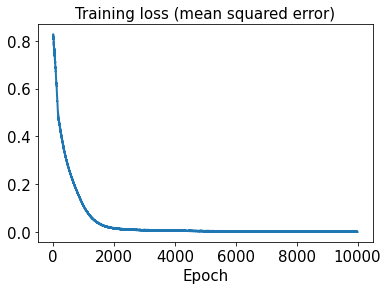

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

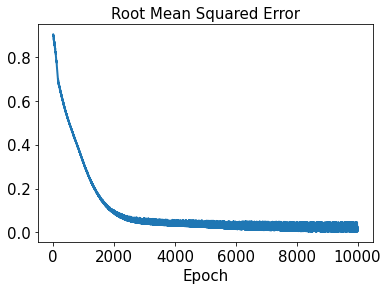

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
decoded_sensor_train1 = sensor_pred1.predict(t_train)

In [25]:
decoded_sensor_test1 = sensor_pred1.predict(t_test)

In [26]:
error_train_abs1 = np.abs(decoded_sensor_train1 - x_train1)

In [27]:
error_test_abs1 = np.abs(decoded_sensor_test1 - x_test1)

In [28]:
error_train_abs1

array([[[4.12383731e-02],
        [2.16385410e-02],
        [2.17217789e-02],
        [4.03690054e-02],
        [3.05651887e-02],
        [6.48009832e-02],
        [7.18822614e-02],
        [8.12025252e-04],
        [5.77694315e-03],
        [1.69470892e-02],
        [1.76052098e-02],
        [5.01039014e-02],
        [3.99673297e-02],
        [8.85316592e-03],
        [5.65476729e-02],
        [4.85901888e-02]],

       [[1.53702476e-01],
        [5.47985760e-02],
        [1.55217775e-01],
        [1.35367564e-01],
        [1.31333050e-01],
        [2.16138639e-01],
        [3.08446425e-01],
        [5.86178980e-02],
        [1.12584911e-02],
        [6.34998111e-02],
        [1.13015554e-01],
        [2.10574496e-01],
        [1.42581634e-01],
        [7.99639307e-02],
        [2.65060243e-01],
        [1.78183653e-01]],

       [[5.89372166e-03],
        [1.02068010e-02],
        [9.07784250e-03],
        [1.07557223e-02],
        [1.64732662e-02],
        [2.14190627e-02],
        

In [29]:
l2_error_sensor_train1 = np.sqrt(np.sum((decoded_sensor_train1 - x_train1)**2) / np.sum(x_train1**2))
print(l2_error_sensor_train1)

0.3453560798688039


In [30]:
l2_error_sensor_test1 = np.sqrt(np.sum((decoded_sensor_test1 - x_test1)**2) / np.sum(x_test1**2))
print(l2_error_sensor_test1)

0.7310998438943938


In [31]:
sensor_pred2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [32]:
start2 = datetime.datetime.now()
history2 = sensor_pred2.fit(t_train, x_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 8ms/step - loss: 2.5897 - rmse: 1.6091
Epoch 2/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.5866 - rmse: 1.6082
Epoch 3/10000
2/2 [==============================] - 0s 20ms/step - loss: 2.5829 - rmse: 1.6070
Epoch 4/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5810 - rmse: 1.6064
Epoch 5/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5775 - rmse: 1.6053
Epoch 6/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.5745 - rmse: 1.6044
Epoch 7/10000
2/2 [==============================] - 0s 20ms/step - loss: 2.5728 - rmse: 1.6039
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5700 - rmse: 1.6030
Epoch 9/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5673 - rmse: 1.6022
Epoch 10/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.5642 - rmse: 1.6012
Epoch 11/10000
2/2 [======================

2/2 [==============================] - 0s 7ms/step - loss: 2.4272 - rmse: 1.5578
Epoch 87/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4250 - rmse: 1.5572
Epoch 88/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4233 - rmse: 1.5566
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4220 - rmse: 1.5562
Epoch 90/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4209 - rmse: 1.5558
Epoch 91/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4196 - rmse: 1.5554
Epoch 92/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4177 - rmse: 1.5548
Epoch 93/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4170 - rmse: 1.5546
Epoch 94/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4156 - rmse: 1.5541
Epoch 95/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4143 - rmse: 1.5537
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 11ms/step - loss: 2.3091 - rmse: 1.5195
Epoch 171/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3077 - rmse: 1.5190
Epoch 172/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3063 - rmse: 1.5186
Epoch 173/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3053 - rmse: 1.5182
Epoch 174/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3039 - rmse: 1.5178
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3028 - rmse: 1.5174
Epoch 176/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3019 - rmse: 1.5171
Epoch 177/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3012 - rmse: 1.5169
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2996 - rmse: 1.5163
Epoch 179/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2975 - rmse: 1.5157
Epoch 180/10000
2/2 [====================

2/2 [==============================] - 0s 7ms/step - loss: 2.1960 - rmse: 1.4818
Epoch 255/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1932 - rmse: 1.4808
Epoch 256/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1923 - rmse: 1.4805
Epoch 257/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1901 - rmse: 1.4798
Epoch 258/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1894 - rmse: 1.4796
Epoch 259/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1875 - rmse: 1.4789
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1881 - rmse: 1.4791
Epoch 261/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1851 - rmse: 1.4781
Epoch 262/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1837 - rmse: 1.4776
Epoch 263/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1824 - rmse: 1.4772
Epoch 264/10000
2/2 [=====================

2/2 [==============================] - 0s 9ms/step - loss: 2.0836 - rmse: 1.4433
Epoch 339/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0799 - rmse: 1.4421
Epoch 340/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0787 - rmse: 1.4416
Epoch 341/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0793 - rmse: 1.4419
Epoch 342/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0761 - rmse: 1.4407
Epoch 343/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0770 - rmse: 1.4411
Epoch 344/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0740 - rmse: 1.4400
Epoch 345/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0723 - rmse: 1.4394
Epoch 346/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0718 - rmse: 1.4392
Epoch 347/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0707 - rmse: 1.4389
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 1.9723 - rmse: 1.4043
Epoch 423/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9723 - rmse: 1.4043
Epoch 424/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9686 - rmse: 1.4030
Epoch 425/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9680 - rmse: 1.4027
Epoch 426/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9664 - rmse: 1.4022
Epoch 427/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9658 - rmse: 1.4019
Epoch 428/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9634 - rmse: 1.4011
Epoch 429/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9628 - rmse: 1.4009
Epoch 430/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9609 - rmse: 1.4002
Epoch 431/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9606 - rmse: 1.4001
Epoch 432/10000
2/2 [=====================

2/2 [==============================] - 0s 7ms/step - loss: 1.8626 - rmse: 1.3646
Epoch 507/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8608 - rmse: 1.3640
Epoch 508/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8620 - rmse: 1.3644
Epoch 509/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8574 - rmse: 1.3627
Epoch 510/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8585 - rmse: 1.3632
Epoch 511/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8565 - rmse: 1.3624
Epoch 512/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8554 - rmse: 1.3620
Epoch 513/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8528 - rmse: 1.3611
Epoch 514/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8519 - rmse: 1.3607
Epoch 515/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8498 - rmse: 1.3600
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 12ms/step - loss: 1.7532 - rmse: 1.3240
Epoch 591/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7546 - rmse: 1.3245
Epoch 592/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7529 - rmse: 1.3239
Epoch 593/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7507 - rmse: 1.3230
Epoch 594/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7498 - rmse: 1.3227
Epoch 595/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7467 - rmse: 1.3215
Epoch 596/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7479 - rmse: 1.3219
Epoch 597/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7443 - rmse: 1.3206
Epoch 598/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7437 - rmse: 1.3204
Epoch 599/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7429 - rmse: 1.3201
Epoch 600/10000
2/2 [==================

2/2 [==============================] - 0s 6ms/step - loss: 1.6468 - rmse: 1.2831
Epoch 675/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6447 - rmse: 1.2823
Epoch 676/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6436 - rmse: 1.2819
Epoch 677/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6445 - rmse: 1.2822
Epoch 678/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6441 - rmse: 1.2821
Epoch 679/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6415 - rmse: 1.2811
Epoch 680/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6379 - rmse: 1.2797
Epoch 681/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6395 - rmse: 1.2803
Epoch 682/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6380 - rmse: 1.2797
Epoch 683/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6371 - rmse: 1.2793
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 11ms/step - loss: 1.5365 - rmse: 1.2394
Epoch 759/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5389 - rmse: 1.2404
Epoch 760/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5360 - rmse: 1.2392
Epoch 761/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5327 - rmse: 1.2379
Epoch 762/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5359 - rmse: 1.2392
Epoch 763/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5339 - rmse: 1.2384
Epoch 764/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5289 - rmse: 1.2363
Epoch 765/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.5274 - rmse: 1.2357
Epoch 766/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5267 - rmse: 1.2355
Epoch 767/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5249 - rmse: 1.2347
Epoch 768/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 1.4292 - rmse: 1.1954
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4281 - rmse: 1.1949
Epoch 844/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4268 - rmse: 1.1943
Epoch 845/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4277 - rmse: 1.1947
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4255 - rmse: 1.1938
Epoch 847/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4251 - rmse: 1.1936
Epoch 848/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4261 - rmse: 1.1941
Epoch 849/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4233 - rmse: 1.1929
Epoch 850/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4201 - rmse: 1.1915
Epoch 851/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4180 - rmse: 1.1907
Epoch 852/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 1.3224 - rmse: 1.1498
Epoch 927/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3205 - rmse: 1.1490
Epoch 928/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3252 - rmse: 1.1510
Epoch 929/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3184 - rmse: 1.1481
Epoch 930/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3222 - rmse: 1.1497
Epoch 931/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3166 - rmse: 1.1473
Epoch 932/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3178 - rmse: 1.1478
Epoch 933/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3161 - rmse: 1.1471
Epoch 934/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3123 - rmse: 1.1454
Epoch 935/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3107 - rmse: 1.1447
Epoch 936/10000
2/2 [==================

Epoch 1010/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2196 - rmse: 1.1042
Epoch 1011/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2181 - rmse: 1.1035
Epoch 1012/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2192 - rmse: 1.1040
Epoch 1013/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2153 - rmse: 1.1022
Epoch 1014/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.2182 - rmse: 1.1036
Epoch 1015/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2130 - rmse: 1.1012
Epoch 1016/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2157 - rmse: 1.1024
Epoch 1017/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2122 - rmse: 1.1009
Epoch 1018/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2096 - rmse: 1.0997
Epoch 1019/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2133 - rmse: 1.1014
Epoch 1020/100

Epoch 1093/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1261 - rmse: 1.0610
Epoch 1094/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1214 - rmse: 1.0588
Epoch 1095/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1226 - rmse: 1.0594
Epoch 1096/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1210 - rmse: 1.0586
Epoch 1097/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1171 - rmse: 1.0568
Epoch 1098/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1144 - rmse: 1.0555
Epoch 1099/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1139 - rmse: 1.0553
Epoch 1100/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1152 - rmse: 1.0559
Epoch 1101/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1160 - rmse: 1.0563
Epoch 1102/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1092 - rmse: 1.0530
Epoch 1103/10

2/2 [==============================] - 0s 8ms/step - loss: 1.0267 - rmse: 1.0131
Epoch 1177/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0257 - rmse: 1.0126
Epoch 1178/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0242 - rmse: 1.0118
Epoch 1179/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0248 - rmse: 1.0122
Epoch 1180/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0278 - rmse: 1.0137
Epoch 1181/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0210 - rmse: 1.0103
Epoch 1182/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0212 - rmse: 1.0104
Epoch 1183/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0193 - rmse: 1.0094
Epoch 1184/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0178 - rmse: 1.0087
Epoch 1185/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0167 - rmse: 1.0081
Epoch 1186/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.9391 - rmse: 0.9689
Epoch 1260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9348 - rmse: 0.9667
Epoch 1261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9365 - rmse: 0.9675
Epoch 1262/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9375 - rmse: 0.9681
Epoch 1263/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9342 - rmse: 0.9664
Epoch 1264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9311 - rmse: 0.9648
Epoch 1265/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9321 - rmse: 0.9653
Epoch 1266/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9301 - rmse: 0.9642
Epoch 1267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9269 - rmse: 0.9626
Epoch 1268/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9284 - rmse: 0.9634
Epoch 1269/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.8515 - rmse: 0.9226
Epoch 1343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8473 - rmse: 0.9203
Epoch 1344/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8454 - rmse: 0.9193
Epoch 1345/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8452 - rmse: 0.9192
Epoch 1346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8434 - rmse: 0.9182
Epoch 1347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8428 - rmse: 0.9179
Epoch 1348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8454 - rmse: 0.9193
Epoch 1349/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8390 - rmse: 0.9158
Epoch 1350/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8391 - rmse: 0.9158
Epoch 1351/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8428 - rmse: 0.9179
Epoch 1352/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.7681 - rmse: 0.8762
Epoch 1426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7632 - rmse: 0.8734
Epoch 1427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7625 - rmse: 0.8730
Epoch 1428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7614 - rmse: 0.8724
Epoch 1429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7660 - rmse: 0.8750
Epoch 1430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7632 - rmse: 0.8735
Epoch 1431/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7587 - rmse: 0.8708
Epoch 1432/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7577 - rmse: 0.8703
Epoch 1433/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7594 - rmse: 0.8713
Epoch 1434/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7568 - rmse: 0.8698
Epoch 1435/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.6908 - rmse: 0.8309
Epoch 1509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6860 - rmse: 0.8280
Epoch 1510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6842 - rmse: 0.8270
Epoch 1511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6824 - rmse: 0.8259
Epoch 1512/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6863 - rmse: 0.8282
Epoch 1513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6842 - rmse: 0.8270
Epoch 1514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6812 - rmse: 0.8252
Epoch 1515/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6787 - rmse: 0.8237
Epoch 1516/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6783 - rmse: 0.8234
Epoch 1517/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6805 - rmse: 0.8247
Epoch 1518/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.6195 - rmse: 0.7869
Epoch 1592/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6170 - rmse: 0.7853
Epoch 1593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6170 - rmse: 0.7853
Epoch 1594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6148 - rmse: 0.7839
Epoch 1595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6127 - rmse: 0.7826
Epoch 1596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6120 - rmse: 0.7821
Epoch 1597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6101 - rmse: 0.7809
Epoch 1598/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6115 - rmse: 0.7818
Epoch 1599/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6057 - rmse: 0.7780
Epoch 1600/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6056 - rmse: 0.7780
Epoch 1601/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.5457 - rmse: 0.7385
Epoch 1675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5432 - rmse: 0.7368
Epoch 1676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5465 - rmse: 0.7391
Epoch 1677/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.5423 - rmse: 0.7362
Epoch 1678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5427 - rmse: 0.7364
Epoch 1679/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.5465 - rmse: 0.7391
Epoch 1680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5404 - rmse: 0.7349
Epoch 1681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5404 - rmse: 0.7349
Epoch 1682/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5420 - rmse: 0.7360
Epoch 1683/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5371 - rmse: 0.7326
Epoch 1684/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.4809 - rmse: 0.6932
Epoch 1758/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4837 - rmse: 0.6953
Epoch 1759/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4793 - rmse: 0.6921
Epoch 1760/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4791 - rmse: 0.6919
Epoch 1761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4788 - rmse: 0.6917
Epoch 1762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4801 - rmse: 0.6926
Epoch 1763/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4824 - rmse: 0.6943
Epoch 1764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4773 - rmse: 0.6907
Epoch 1765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4752 - rmse: 0.6891
Epoch 1766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4788 - rmse: 0.6917
Epoch 1767/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.4251 - rmse: 0.6517
Epoch 1841/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4246 - rmse: 0.6514
Epoch 1842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4258 - rmse: 0.6523
Epoch 1843/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4272 - rmse: 0.6533
Epoch 1844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4249 - rmse: 0.6516
Epoch 1845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4252 - rmse: 0.6518
Epoch 1846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4269 - rmse: 0.6532
Epoch 1847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4269 - rmse: 0.6531
Epoch 1848/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4201 - rmse: 0.6479
Epoch 1849/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4254 - rmse: 0.6520
Epoch 1850/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.3765 - rmse: 0.6133
Epoch 1924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3748 - rmse: 0.6119
Epoch 1925/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3766 - rmse: 0.6134
Epoch 1926/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3730 - rmse: 0.6105
Epoch 1927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3706 - rmse: 0.6085
Epoch 1928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3706 - rmse: 0.6085
Epoch 1929/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3687 - rmse: 0.6069
Epoch 1930/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3694 - rmse: 0.6075
Epoch 1931/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3710 - rmse: 0.6088
Epoch 1932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3745 - rmse: 0.6117
Epoch 1933/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.3253 - rmse: 0.5701
Epoch 2007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3237 - rmse: 0.5686
Epoch 2008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3247 - rmse: 0.5695
Epoch 2009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3235 - rmse: 0.5685
Epoch 2010/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3282 - rmse: 0.5726
Epoch 2011/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3213 - rmse: 0.5666
Epoch 2012/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3266 - rmse: 0.5712
Epoch 2013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3219 - rmse: 0.5671
Epoch 2014/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3200 - rmse: 0.5654
Epoch 2015/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3229 - rmse: 0.5680
Epoch 2016/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.2832 - rmse: 0.5319
Epoch 2090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2815 - rmse: 0.5303
Epoch 2091/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2833 - rmse: 0.5320
Epoch 2092/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2811 - rmse: 0.5299
Epoch 2093/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2807 - rmse: 0.5295
Epoch 2094/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2795 - rmse: 0.5284
Epoch 2095/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2845 - rmse: 0.5331
Epoch 2096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2786 - rmse: 0.5275
Epoch 2097/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2798 - rmse: 0.5286
Epoch 2098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2780 - rmse: 0.5269
Epoch 2099/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.2497 - rmse: 0.4994
Epoch 2173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2499 - rmse: 0.4996
Epoch 2174/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2454 - rmse: 0.4951
Epoch 2175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2419 - rmse: 0.4915
Epoch 2176/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2476 - rmse: 0.4972
Epoch 2177/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2410 - rmse: 0.4906
Epoch 2178/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2404 - rmse: 0.4900
Epoch 2179/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2400 - rmse: 0.4896
Epoch 2180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2416 - rmse: 0.4912
Epoch 2181/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2408 - rmse: 0.4904
Epoch 2182/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.2155 - rmse: 0.4639
Epoch 2256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2134 - rmse: 0.4616
Epoch 2257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2126 - rmse: 0.4608
Epoch 2258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2101 - rmse: 0.4581
Epoch 2259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2124 - rmse: 0.4606
Epoch 2260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2073 - rmse: 0.4550
Epoch 2261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2123 - rmse: 0.4605
Epoch 2262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2056 - rmse: 0.4530
Epoch 2263/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2109 - rmse: 0.4589
Epoch 2264/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2053 - rmse: 0.4528
Epoch 2265/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.1780 - rmse: 0.4216
Epoch 2339/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1772 - rmse: 0.4206
Epoch 2340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1775 - rmse: 0.4209
Epoch 2341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1794 - rmse: 0.4232
Epoch 2342/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1761 - rmse: 0.4192
Epoch 2343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1758 - rmse: 0.4189
Epoch 2344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1792 - rmse: 0.4230
Epoch 2345/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1784 - rmse: 0.4221
Epoch 2346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1750 - rmse: 0.4180
Epoch 2347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1801 - rmse: 0.4241
Epoch 2348/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.1526 - rmse: 0.3903
Epoch 2422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1520 - rmse: 0.3894
Epoch 2423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1539 - rmse: 0.3919
Epoch 2424/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1501 - rmse: 0.3870
Epoch 2425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1499 - rmse: 0.3867
Epoch 2426/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1488 - rmse: 0.3854
Epoch 2427/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1541 - rmse: 0.3922
Epoch 2428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1496 - rmse: 0.3864
Epoch 2429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1469 - rmse: 0.3829
Epoch 2430/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1522 - rmse: 0.3897
Epoch 2431/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.1253 - rmse: 0.3535
Epoch 2505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1318 - rmse: 0.3626
Epoch 2506/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1250 - rmse: 0.3532
Epoch 2507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1281 - rmse: 0.3576
Epoch 2508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1291 - rmse: 0.3589
Epoch 2509/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1277 - rmse: 0.3569
Epoch 2510/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1286 - rmse: 0.3582
Epoch 2511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1241 - rmse: 0.3518
Epoch 2512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1247 - rmse: 0.3528
Epoch 2513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1244 - rmse: 0.3522
Epoch 2514/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.1081 - rmse: 0.3283
Epoch 2588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1108 - rmse: 0.3324
Epoch 2589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1078 - rmse: 0.3279
Epoch 2590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1049 - rmse: 0.3234
Epoch 2591/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1090 - rmse: 0.3297
Epoch 2592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1072 - rmse: 0.3270
Epoch 2593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1045 - rmse: 0.3229
Epoch 2594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1097 - rmse: 0.3308
Epoch 2595/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1074 - rmse: 0.3273
Epoch 2596/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1048 - rmse: 0.3232
Epoch 2597/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0901 - rmse: 0.2997
Epoch 2671/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0861 - rmse: 0.2929
Epoch 2672/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0878 - rmse: 0.2958
Epoch 2673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0857 - rmse: 0.2923
Epoch 2674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0877 - rmse: 0.2957
Epoch 2675/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0908 - rmse: 0.3008
Epoch 2676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0900 - rmse: 0.2995
Epoch 2677/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0898 - rmse: 0.2992
Epoch 2678/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0851 - rmse: 0.2911
Epoch 2679/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0894 - rmse: 0.2984
Epoch 2680/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0731 - rmse: 0.2698
Epoch 2754/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0769 - rmse: 0.2767
Epoch 2755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0774 - rmse: 0.2777
Epoch 2756/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0752 - rmse: 0.2737
Epoch 2757/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0751 - rmse: 0.2735
Epoch 2758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0726 - rmse: 0.2689
Epoch 2759/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0709 - rmse: 0.2657
Epoch 2760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0704 - rmse: 0.2647
Epoch 2761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0724 - rmse: 0.2686
Epoch 2762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0751 - rmse: 0.2735
Epoch 2763/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0569 - rmse: 0.2380
Epoch 2837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0569 - rmse: 0.2378
Epoch 2838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0630 - rmse: 0.2504
Epoch 2839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0585 - rmse: 0.2412
Epoch 2840/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0575 - rmse: 0.2393
Epoch 2841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0584 - rmse: 0.2411
Epoch 2842/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0578 - rmse: 0.2397
Epoch 2843/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0588 - rmse: 0.2418
Epoch 2844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0619 - rmse: 0.2481
Epoch 2845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0585 - rmse: 0.2412
Epoch 2846/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0500 - rmse: 0.2230
Epoch 2920/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0511 - rmse: 0.2254
Epoch 2921/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0487 - rmse: 0.2200
Epoch 2922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0459 - rmse: 0.2137
Epoch 2923/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0496 - rmse: 0.2220
Epoch 2924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0475 - rmse: 0.2173
Epoch 2925/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0504 - rmse: 0.2239
Epoch 2926/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0455 - rmse: 0.2125
Epoch 2927/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0452 - rmse: 0.2119
Epoch 2928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0484 - rmse: 0.2194
Epoch 2929/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0415 - rmse: 0.2030
Epoch 3003/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0400 - rmse: 0.1992
Epoch 3004/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0371 - rmse: 0.1919
Epoch 3005/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - rmse: 0.1917
Epoch 3006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0375 - rmse: 0.1929
Epoch 3007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0392 - rmse: 0.1972
Epoch 3008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0378 - rmse: 0.1938
Epoch 3009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0364 - rmse: 0.1901
Epoch 3010/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0430 - rmse: 0.2066
Epoch 3011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0418 - rmse: 0.2039
Epoch 3012/10000
2/2 [===========

2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - rmse: 0.1871
Epoch 3086/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0303 - rmse: 0.1733
Epoch 3087/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0322 - rmse: 0.1785
Epoch 3088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0322 - rmse: 0.1787
Epoch 3089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0300 - rmse: 0.1723
Epoch 3090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0342 - rmse: 0.1841
Epoch 3091/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0287 - rmse: 0.1686
Epoch 3092/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0284 - rmse: 0.1677
Epoch 3093/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0291 - rmse: 0.1696
Epoch 3094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0293 - rmse: 0.1704
Epoch 3095/10000
2/2 [==========

2/2 [==============================] - 0s 10ms/step - loss: 0.0279 - rmse: 0.1661
Epoch 3169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0270 - rmse: 0.1635
Epoch 3170/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0255 - rmse: 0.1586
Epoch 3171/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0281 - rmse: 0.1668
Epoch 3172/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0262 - rmse: 0.1610
Epoch 3173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0235 - rmse: 0.1524
Epoch 3174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0257 - rmse: 0.1594
Epoch 3175/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0272 - rmse: 0.1641
Epoch 3176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0234 - rmse: 0.1519
Epoch 3177/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0230 - rmse: 0.1507
Epoch 3178/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0184 - rmse: 0.1347
Epoch 3252/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0183 - rmse: 0.1343
Epoch 3253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0238 - rmse: 0.1534
Epoch 3254/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0179 - rmse: 0.1326
Epoch 3255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0193 - rmse: 0.1380
Epoch 3256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0209 - rmse: 0.1436
Epoch 3257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0178 - rmse: 0.1325
Epoch 3258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0189 - rmse: 0.1364
Epoch 3259/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0215 - rmse: 0.1456
Epoch 3260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0198 - rmse: 0.1396
Epoch 3261/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0191 - rmse: 0.1371
Epoch 3335/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0153 - rmse: 0.1224
Epoch 3336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0211 - rmse: 0.1443
Epoch 3337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0143 - rmse: 0.1183
Epoch 3338/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0210 - rmse: 0.1439
Epoch 3339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0187 - rmse: 0.1357
Epoch 3340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0151 - rmse: 0.1216
Epoch 3341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0187 - rmse: 0.1356
Epoch 3342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0180 - rmse: 0.1332
Epoch 3343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0174 - rmse: 0.1308
Epoch 3344/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0127 - rmse: 0.1114
Epoch 3418/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0150 - rmse: 0.1212
Epoch 3419/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0130 - rmse: 0.1128
Epoch 3420/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0142 - rmse: 0.1181
Epoch 3421/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0110 - rmse: 0.1032
Epoch 3422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0110 - rmse: 0.1036
Epoch 3423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0145 - rmse: 0.1193
Epoch 3424/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0186 - rmse: 0.1355
Epoch 3425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0146 - rmse: 0.1197
Epoch 3426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0158 - rmse: 0.1245
Epoch 3427/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0153 - rmse: 0.1224
Epoch 3501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0946
Epoch 3502/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0139 - rmse: 0.1166
Epoch 3503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0946
Epoch 3504/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0155 - rmse: 0.1235
Epoch 3505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0105 - rmse: 0.1010
Epoch 3506/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0132 - rmse: 0.1135
Epoch 3507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0956
Epoch 3508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0934
Epoch 3509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0936
Epoch 3510/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0148 - rmse: 0.1202
Epoch 3584/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0894
Epoch 3585/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0951
Epoch 3586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0869
Epoch 3587/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0107 - rmse: 0.1018
Epoch 3588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0921
Epoch 3589/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0833
Epoch 3590/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0987
Epoch 3591/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0868
Epoch 3592/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0858
Epoch 3593/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0120 - rmse: 0.1083
Epoch 3667/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0086 - rmse: 0.0913
Epoch 3668/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0869
Epoch 3669/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0836
Epoch 3670/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0825
Epoch 3671/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0859
Epoch 3672/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0762
Epoch 3673/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0090 - rmse: 0.0932
Epoch 3674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0898
Epoch 3675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0132 - rmse: 0.1138
Epoch 3676/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0050 - rmse: 0.0689
Epoch 3750/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0075 - rmse: 0.0852
Epoch 3751/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0831
Epoch 3752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0693
Epoch 3753/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0698
Epoch 3754/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0089 - rmse: 0.0930
Epoch 3755/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0079 - rmse: 0.0871
Epoch 3756/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0731
Epoch 3757/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0776
Epoch 3758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0826
Epoch 3759/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0638
Epoch 3833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0693
Epoch 3834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0907
Epoch 3835/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0761
Epoch 3836/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0832
Epoch 3837/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0963
Epoch 3838/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0721
Epoch 3839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.0994
Epoch 3840/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0738
Epoch 3841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0837
Epoch 3842/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0112 - rmse: 0.1045
Epoch 3916/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0900
Epoch 3917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0676
Epoch 3918/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0937
Epoch 3919/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0871
Epoch 3920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0802
Epoch 3921/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0595
Epoch 3922/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - rmse: 0.0979
Epoch 3923/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0727
Epoch 3924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0772
Epoch 3925/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0844
Epoch 3999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0676
Epoch 4000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0844
Epoch 4001/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0786
Epoch 4002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0701
Epoch 4003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0649
Epoch 4004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0584
Epoch 4005/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0651
Epoch 4006/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0701
Epoch 4007/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0102 - rmse: 0.0998
Epoch 4008/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0731
Epoch 4082/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0675
Epoch 4083/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0052 - rmse: 0.0698
Epoch 4084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0600
Epoch 4085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0904
Epoch 4086/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0109 - rmse: 0.1029
Epoch 4087/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0890
Epoch 4088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0804
Epoch 4089/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0657
Epoch 4090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - rmse: 0.1007
Epoch 4091/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0814
Epoch 4165/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0061 - rmse: 0.0763
Epoch 4166/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0842
Epoch 4167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0807
Epoch 4168/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0519
Epoch 4169/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0633
Epoch 4170/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0636
Epoch 4171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0831
Epoch 4172/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0531
Epoch 4173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0513
Epoch 4174/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0610
Epoch 4248/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0845
Epoch 4249/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0058 - rmse: 0.0741
Epoch 4250/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0095 - rmse: 0.0958
Epoch 4251/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0679
Epoch 4252/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0807
Epoch 4253/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0662
Epoch 4254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0597
Epoch 4255/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0608
Epoch 4256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0879
Epoch 4257/10000
2/2 [==========

2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - rmse: 0.0979
Epoch 4331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0506
Epoch 4332/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0515
Epoch 4333/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0820
Epoch 4334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0593
Epoch 4335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0595
Epoch 4336/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0510
Epoch 4337/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0467
Epoch 4338/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0528
Epoch 4339/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0492
Epoch 4340/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0470
Epoch 4414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0888
Epoch 4415/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0457
Epoch 4416/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0528
Epoch 4417/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 4418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0581
Epoch 4419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0870
Epoch 4420/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0585
Epoch 4421/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0064 - rmse: 0.0780
Epoch 4422/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0477
Epoch 4423/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0932
Epoch 4497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0471
Epoch 4498/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0481
Epoch 4499/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0940
Epoch 4500/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0446
Epoch 4501/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0601
Epoch 4502/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0982
Epoch 4503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0803
Epoch 4504/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0477
Epoch 4505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0801
Epoch 4506/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0482
Epoch 4580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 4581/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0458
Epoch 4582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0934
Epoch 4583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0694
Epoch 4584/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0728
Epoch 4585/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0737
Epoch 4586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0467
Epoch 4587/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0658
Epoch 4588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0971
Epoch 4589/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0452
Epoch 4662/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0959
Epoch 4663/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0752
Epoch 4664/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0434
Epoch 4665/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0419
Epoch 4666/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0051 - rmse: 0.0693
Epoch 4667/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0478
Epoch 4668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0434
Epoch 4669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0922
Epoch 4670/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0548
Epoch 4671/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0819
Epoch 4745/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0415
Epoch 4746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0515
Epoch 4747/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0513
Epoch 4748/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0888
Epoch 4749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0406
Epoch 4750/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0924
Epoch 4751/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 4752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0608
Epoch 4753/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0547
Epoch 4754/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0910
Epoch 4828/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0511
Epoch 4829/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0052 - rmse: 0.0701
Epoch 4830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0944
Epoch 4831/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0619
Epoch 4832/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 4833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0596
Epoch 4834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0903
Epoch 4835/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0408
Epoch 4836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0432
Epoch 4837/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0509
Epoch 4911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0550
Epoch 4912/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0510
Epoch 4913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0545
Epoch 4914/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 4915/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - rmse: 0.0972
Epoch 4916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0822
Epoch 4917/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0374
Epoch 4918/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0436
Epoch 4919/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0397
Epoch 4920/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0680
Epoch 4994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0688
Epoch 4995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0836
Epoch 4996/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 4997/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0685
Epoch 4998/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0483
Epoch 4999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0751
Epoch 5000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0344
Epoch 5001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0675
Epoch 5002/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0461
Epoch 5003/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 5077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0845
Epoch 5078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0583
Epoch 5079/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0360
Epoch 5080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0657
Epoch 5081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0944
Epoch 5082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0683
Epoch 5083/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0759
Epoch 5084/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0838
Epoch 5085/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0415
Epoch 5086/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0625
Epoch 5160/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0835
Epoch 5161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0444
Epoch 5162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0640
Epoch 5163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0864
Epoch 5164/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0518
Epoch 5165/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0373
Epoch 5166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0664
Epoch 5167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0453
Epoch 5168/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0343
Epoch 5169/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0666
Epoch 5243/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0470
Epoch 5244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0667
Epoch 5245/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0539
Epoch 5246/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0656
Epoch 5247/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 5248/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0823
Epoch 5249/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0665
Epoch 5250/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0317
Epoch 5251/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0654
Epoch 5252/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0511
Epoch 5326/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0848
Epoch 5327/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0455
Epoch 5328/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0529
Epoch 5329/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 5330/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 5331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0606
Epoch 5332/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0315
Epoch 5333/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0502
Epoch 5334/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0572
Epoch 5335/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 5409/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0684
Epoch 5410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0328
Epoch 5411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0462
Epoch 5412/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0534
Epoch 5413/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0357
Epoch 5414/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4785e-04 - rmse: 0.0259
Epoch 5415/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0699
Epoch 5416/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6471e-04 - rmse: 0.0262
Epoch 5417/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0064 - rmse: 0.0784
Epoch 5418/10000
2/2 [

2/2 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0880
Epoch 5492/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0600
Epoch 5493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 5494/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0859
Epoch 5495/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0472
Epoch 5496/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0847
Epoch 5497/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0654
Epoch 5498/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0817
Epoch 5499/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 5500/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6448e-04 - rmse: 0.0262
Epoch 5501/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0330
Epoch 5574/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0699
Epoch 5575/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0280
Epoch 5576/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0452
Epoch 5577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0617
Epoch 5578/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0603
Epoch 5579/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 5580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0614
Epoch 5581/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 5582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 5583/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0481
Epoch 5656/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0432
Epoch 5657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0646
Epoch 5658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 5659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0440
Epoch 5660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0600
Epoch 5661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0598
Epoch 5662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 5663/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0586
Epoch 5664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0799
Epoch 5665/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0682
Epoch 5738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0380
Epoch 5739/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0637
Epoch 5740/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.9468e-04 - rmse: 0.0227
Epoch 5741/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0457
Epoch 5742/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0591
Epoch 5743/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0807
Epoch 5744/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0352
Epoch 5745/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0803
Epoch 5746/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0278
Epoch 5747/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0806
Epoch 5820/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.7384e-04 - rmse: 0.0244
Epoch 5821/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.1529e-04 - rmse: 0.0209
Epoch 5822/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0286
Epoch 5823/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3441e-04 - rmse: 0.0214
Epoch 5824/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.9832e-04 - rmse: 0.0205
Epoch 5825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0726
Epoch 5826/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0286e-04 - rmse: 0.0206
Epoch 5827/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 5828/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0075 - rmse: 0.0851
Epoch 5829/

2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0512
Epoch 5902/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9146e-04 - rmse: 0.0204
Epoch 5903/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0428
Epoch 5904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0416
Epoch 5905/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0665
Epoch 5906/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0761
Epoch 5907/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 5908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 5909/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6605e-04 - rmse: 0.0262
Epoch 5910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0899
Epoch 5911/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0415
Epoch 5984/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0628
Epoch 5985/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 5986/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0667
Epoch 5987/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4076e-04 - rmse: 0.0237
Epoch 5988/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0487
Epoch 5989/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0907e-04 - rmse: 0.0182
Epoch 5990/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0758
Epoch 5991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0895
Epoch 5992/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0612
Epoch 5993/10000
2/2 [

2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0422
Epoch 6066/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0757
Epoch 6067/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0712
Epoch 6068/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0765
Epoch 6069/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0750
Epoch 6070/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.2035e-04 - rmse: 0.0254
Epoch 6071/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 6072/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0592
Epoch 6073/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0084 - rmse: 0.0899
Epoch 6074/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0498
Epoch 6075/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0633
Epoch 6148/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0801
Epoch 6149/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0457
Epoch 6150/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5114e-04 - rmse: 0.0240
Epoch 6151/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0082 - rmse: 0.0888
Epoch 6152/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5321e-04 - rmse: 0.0218
Epoch 6153/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0657
Epoch 6154/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 6155/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5923e-04 - rmse: 0.0220
Epoch 6156/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9699e-04 - rmse: 0.0228
Epoch 6157/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 8.1803e-04 - rmse: 0.0233
Epoch 6230/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0755
Epoch 6231/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0622
Epoch 6232/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 6233/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0743
Epoch 6234/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0754
Epoch 6235/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0581
Epoch 6236/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0317
Epoch 6237/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0373
Epoch 6238/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2604e-04 - rmse: 0.0187
Epoch 6239/10000
2/2 [=======

2/2 [==============================] - 0s 12ms/step - loss: 6.7709e-04 - rmse: 0.0200
Epoch 6312/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0779
Epoch 6313/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0208e-04 - rmse: 0.0207
Epoch 6314/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0407
Epoch 6315/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0488
Epoch 6316/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 6317/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0854
Epoch 6318/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0893
Epoch 6319/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0267e-04 - rmse: 0.0207
Epoch 6320/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1790e-04 - rmse: 0.0210
Epoch 6321/1000

2/2 [==============================] - 0s 12ms/step - loss: 8.0453e-04 - rmse: 0.0230
Epoch 6394/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0891
Epoch 6395/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0697
Epoch 6396/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0623
Epoch 6397/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0697
Epoch 6398/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.3135e-04 - rmse: 0.0236
Epoch 6399/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0740
Epoch 6400/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4915e-04 - rmse: 0.0193
Epoch 6401/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0834
Epoch 6402/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0893
Epoch 6403/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 5.9751e-04 - rmse: 0.0180
Epoch 6476/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0475
Epoch 6477/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0788
Epoch 6478/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.8999e-04 - rmse: 0.0147
Epoch 6479/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0572
Epoch 6480/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0516
Epoch 6481/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0474
Epoch 6482/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8812e-04 - rmse: 0.0203
Epoch 6483/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0347
Epoch 6484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0844
Epoch 6485/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 6558/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5935e-04 - rmse: 0.0169
Epoch 6559/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9080e-04 - rmse: 0.0204
Epoch 6560/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0616
Epoch 6561/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0356
Epoch 6562/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5737e-04 - rmse: 0.0196
Epoch 6563/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0654
Epoch 6564/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2969e-04 - rmse: 0.0160
Epoch 6565/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0482
Epoch 6566/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0568
Epoch 6567/1000

2/2 [==============================] - 0s 8ms/step - loss: 5.9995e-04 - rmse: 0.0181
Epoch 6640/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 6641/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0614
Epoch 6642/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3042e-04 - rmse: 0.0214
Epoch 6643/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3436e-04 - rmse: 0.0161
Epoch 6644/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0790
Epoch 6645/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0830
Epoch 6646/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8115e-04 - rmse: 0.0202
Epoch 6647/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0321
Epoch 6648/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0841
Epoch 6649/1000

2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0572
Epoch 6722/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0747
Epoch 6723/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0619
Epoch 6724/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.9152e-04 - rmse: 0.0178
Epoch 6725/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5438e-04 - rmse: 0.0134
Epoch 6726/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0580
Epoch 6727/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0583
Epoch 6728/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0490
Epoch 6729/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0399
Epoch 6730/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0558
Epoch 6731/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 7.7364e-04 - rmse: 0.0224
Epoch 6804/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0663
Epoch 6805/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0650
Epoch 6806/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6182e-04 - rmse: 0.0094
Epoch 6807/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0598
Epoch 6808/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0353
Epoch 6809/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0597
Epoch 6810/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0774
Epoch 6811/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0309
Epoch 6812/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.9259e-04 - rmse: 0.0148
Epoch 6813/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0477
Epoch 6886/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0835
Epoch 6887/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0345
Epoch 6888/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0388
Epoch 6889/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0355
Epoch 6890/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 6891/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0793
Epoch 6892/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0826
Epoch 6893/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0774
Epoch 6894/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 6895/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 6.8506e-04 - rmse: 0.0203
Epoch 6968/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0788
Epoch 6969/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8829e-04 - rmse: 0.0178
Epoch 6970/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3359e-04 - rmse: 0.0127
Epoch 6971/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0780
Epoch 6972/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 6973/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0479
Epoch 6974/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0825
Epoch 6975/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2741e-04 - rmse: 0.0236
Epoch 6976/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0566
Epoch 6977/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 7050/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2265e-04 - rmse: 0.0187
Epoch 7051/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0829
Epoch 7052/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0513
Epoch 7053/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0440
Epoch 7054/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.1006e-04 - rmse: 0.0154
Epoch 7055/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0790
Epoch 7056/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0822
Epoch 7057/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0514
Epoch 7058/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1040e-04 - rmse: 0.0184
Epoch 7059/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 7.1918e-04 - rmse: 0.0212
Epoch 7132/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0653
Epoch 7133/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0510
Epoch 7134/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2105e-04 - rmse: 0.0158
Epoch 7135/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0424
Epoch 7136/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0752
Epoch 7137/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0736
Epoch 7138/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0598
Epoch 7139/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1672e-04 - rmse: 0.0186
Epoch 7140/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0485
Epoch 7141/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0794
Epoch 7214/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 7215/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4830e-04 - rmse: 0.0218
Epoch 7216/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0878
Epoch 7217/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0509
Epoch 7218/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0816
Epoch 7219/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0485
Epoch 7220/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0839e-04 - rmse: 0.0252
Epoch 7221/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0830
Epoch 7222/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 7223/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0752
Epoch 7296/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0476
Epoch 7297/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4585e-04 - rmse: 0.0218
Epoch 7298/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.0512e-04 - rmse: 0.0116
Epoch 7299/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0264e-04 - rmse: 0.0115
Epoch 7300/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0825
Epoch 7301/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0640
Epoch 7302/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0595
Epoch 7303/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0385
Epoch 7304/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0829
Epoch 7305/10000
2

2/2 [==============================] - 0s 7ms/step - loss: 3.7254e-04 - rmse: 0.0101
Epoch 7378/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0800
Epoch 7379/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 7380/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 7381/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0689
Epoch 7382/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6022e-04 - rmse: 0.0138
Epoch 7383/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0686
Epoch 7384/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7731e-04 - rmse: 0.0175
Epoch 7385/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0731
Epoch 7386/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0685
Epoch 7387/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0297
Epoch 7460/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0563
Epoch 7461/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 7462/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0771
Epoch 7463/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0349
Epoch 7464/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6366e-04 - rmse: 0.0222
Epoch 7465/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0385
Epoch 7466/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0781
Epoch 7467/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0791
Epoch 7468/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.5847e-04 - rmse: 0.0262
Epoch 7469/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0858
Epoch 7542/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0438
Epoch 7543/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0432
Epoch 7544/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9703e-04 - rmse: 0.0113
Epoch 7545/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0607
Epoch 7546/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7888e-04 - rmse: 0.0145
Epoch 7547/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0477
Epoch 7548/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0296
Epoch 7549/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0057 - rmse: 0.0735
Epoch 7550/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0734
Epoch 7551/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0479
Epoch 7624/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0645
Epoch 7625/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0466e-04 - rmse: 0.0154
Epoch 7626/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7606e-04 - rmse: 0.0104
Epoch 7627/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0829
Epoch 7628/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3403e-04 - rmse: 0.0163
Epoch 7629/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0644
Epoch 7630/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0219e-04 - rmse: 0.0208
Epoch 7631/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0836
Epoch 7632/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0650e-04 - rmse: 0.0184
Epoch 7633/

2/2 [==============================] - 0s 12ms/step - loss: 7.6149e-04 - rmse: 0.0222
Epoch 7706/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0559
Epoch 7707/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0771
Epoch 7708/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0782
Epoch 7709/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.3919e-04 - rmse: 0.0165
Epoch 7710/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0079 - rmse: 0.0872
Epoch 7711/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0681
Epoch 7712/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0355
Epoch 7713/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9195e-04 - rmse: 0.0111
Epoch 7714/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0063 - rmse: 0.0775
Epoch 7715/10000
2

2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0389
Epoch 7788/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1416e-04 - rmse: 0.0186
Epoch 7789/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0479
Epoch 7790/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0823
Epoch 7791/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1469e-04 - rmse: 0.0186
Epoch 7792/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0008e-04 - rmse: 0.0115
Epoch 7793/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0466
Epoch 7794/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0434
Epoch 7795/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 7796/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0643
Epoch 7797/10000
2

2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0663
Epoch 7870/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0562
Epoch 7871/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0783
Epoch 7872/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.0114e-04 - rmse: 0.0153
Epoch 7873/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0790
Epoch 7874/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0437
Epoch 7875/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0317
Epoch 7876/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5700e-04 - rmse: 0.0170
Epoch 7877/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0516
Epoch 7878/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0789
Epoch 7879/10000
2/2 [

2/2 [==============================] - 0s 13ms/step - loss: 5.8586e-04 - rmse: 0.0179
Epoch 7952/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.9952e-04 - rmse: 0.0115
Epoch 7953/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 7954/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0607
Epoch 7955/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0842
Epoch 7956/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6089e-04 - rmse: 0.0244
Epoch 7957/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0656
Epoch 7958/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0831
Epoch 7959/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 7960/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0522
Epoch 7961/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0353
Epoch 8034/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0796
Epoch 8035/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.2641e-04 - rmse: 0.0190
Epoch 8036/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.8940e-04 - rmse: 0.0180
Epoch 8037/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0827
Epoch 8038/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0683
Epoch 8039/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0481
Epoch 8040/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0477
Epoch 8041/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0683
Epoch 8042/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0473
Epoch 8043/10000
2/2 [

2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0611
Epoch 8116/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0275
Epoch 8117/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0599
Epoch 8118/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0737
Epoch 8119/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0689
Epoch 8120/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0776
Epoch 8121/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0786
Epoch 8122/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0523
Epoch 8123/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0659
Epoch 8124/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9246e-04 - rmse: 0.0270
Epoch 8125/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0398
Epoch 8198/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0814
Epoch 8199/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0651
Epoch 8200/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0781
Epoch 8201/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0479
Epoch 8202/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0815
Epoch 8203/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0389
Epoch 8204/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0817
Epoch 8205/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0548
Epoch 8206/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0473
Epoch 8207/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0480
Epoch 8280/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0701
Epoch 8281/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0846
Epoch 8282/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 8283/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.0495e-04 - rmse: 0.0253
Epoch 8284/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0738
Epoch 8285/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0794
Epoch 8286/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0526
Epoch 8287/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0373
Epoch 8288/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0397
Epoch 8289/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 6.1067e-04 - rmse: 0.0186
Epoch 8362/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 8363/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0577
Epoch 8364/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0416
Epoch 8365/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.9775e-04 - rmse: 0.0231
Epoch 8366/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0579
Epoch 8367/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0427
Epoch 8368/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0539
Epoch 8369/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0457
Epoch 8370/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0812
Epoch 8371/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 6.7109e-04 - rmse: 0.0202
Epoch 8444/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9539e-04 - rmse: 0.0231
Epoch 8445/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0614
Epoch 8446/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0558
Epoch 8447/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0556
Epoch 8448/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0350
Epoch 8449/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0566
Epoch 8450/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0860e-04 - rmse: 0.0234
Epoch 8451/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0833
Epoch 8452/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5901e-04 - rmse: 0.0199
Epoch 8453/100

2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 8526/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 8527/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0750
Epoch 8528/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 8529/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0819
Epoch 8530/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0347
Epoch 8531/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0550
Epoch 8532/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0605
Epoch 8533/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0680
Epoch 8534/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6400e-04 - rmse: 0.0142
Epoch 8535/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 4.3502e-04 - rmse: 0.0132
Epoch 8608/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8285e-04 - rmse: 0.0268
Epoch 8609/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9611e-04 - rmse: 0.0116
Epoch 8610/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.8195e-04 - rmse: 0.0268
Epoch 8611/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.8355e-04 - rmse: 0.0179
Epoch 8612/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0517
Epoch 8613/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0559
Epoch 8614/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0689
Epoch 8615/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0775
Epoch 8616/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0616
Epoch 8617

2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0779
Epoch 8690/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0833
Epoch 8691/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0580
Epoch 8692/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.8538e-04 - rmse: 0.0206
Epoch 8693/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0475
Epoch 8694/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0748
Epoch 8695/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 8696/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0617
Epoch 8697/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 8698/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0781
Epoch 8699/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0679
Epoch 8772/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0768
Epoch 8773/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0736
Epoch 8774/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0680
Epoch 8775/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0392
Epoch 8776/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 8777/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5495e-04 - rmse: 0.0097
Epoch 8778/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.2848e-04 - rmse: 0.0164
Epoch 8779/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1583e-04 - rmse: 0.0074
Epoch 8780/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0469
Epoch 8781/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0784
Epoch 8854/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0823
Epoch 8855/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.4581e-04 - rmse: 0.0262
Epoch 8856/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0402
Epoch 8857/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0643
Epoch 8858/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5069e-04 - rmse: 0.0198
Epoch 8859/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0392
Epoch 8860/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0784
Epoch 8861/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0336
Epoch 8862/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0554
Epoch 8863/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0736
Epoch 8936/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 8937/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0349
Epoch 8938/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0635
Epoch 8939/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0603
Epoch 8940/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3560e-04 - rmse: 0.0166
Epoch 8941/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.0506e-04 - rmse: 0.0068
Epoch 8942/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.8522e-04 - rmse: 0.0250
Epoch 8943/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0508
Epoch 8944/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0461
Epoch 8945/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 9018/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0734
Epoch 9019/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2312e-04 - rmse: 0.0258
Epoch 9020/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.1843e-04 - rmse: 0.0215
Epoch 9021/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0387
Epoch 9022/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0375
Epoch 9023/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0506
Epoch 9024/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0562
Epoch 9025/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4217e-04 - rmse: 0.0262
Epoch 9026/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0462
Epoch 9027/10000
2

2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 9100/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0568
Epoch 9101/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4895e-04 - rmse: 0.0138
Epoch 9102/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4771e-04 - rmse: 0.0095
Epoch 9103/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0827
Epoch 9104/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0833
Epoch 9105/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0683
Epoch 9106/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0828
Epoch 9107/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0872
Epoch 9108/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0494
Epoch 9109/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0739
Epoch 9182/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.9149e-04 - rmse: 0.0116
Epoch 9183/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0828
Epoch 9184/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0064 - rmse: 0.0781
Epoch 9185/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0344
Epoch 9186/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0826
Epoch 9187/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0781
Epoch 9188/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0607
Epoch 9189/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0355
Epoch 9190/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0508
Epoch 9191/10000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0785
Epoch 9264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0479
Epoch 9265/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0873
Epoch 9266/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0557
Epoch 9267/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0540e-04 - rmse: 0.0187
Epoch 9268/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0304
Epoch 9269/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0689
Epoch 9270/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5915e-04 - rmse: 0.0174
Epoch 9271/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0649
Epoch 9272/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0423
Epoch 9273/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 3.1252e-04 - rmse: 0.0076
Epoch 9346/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9332e-04 - rmse: 0.0154
Epoch 9347/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2025e-04 - rmse: 0.0216
Epoch 9348/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9975e-04 - rmse: 0.0067
Epoch 9349/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0894
Epoch 9350/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0548
Epoch 9351/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0680
Epoch 9352/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3797e-04 - rmse: 0.0220
Epoch 9353/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0514
Epoch 9354/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0274
Epoch 9355

2/2 [==============================] - 0s 12ms/step - loss: 4.7116e-04 - rmse: 0.0147
Epoch 9428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0560
Epoch 9429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0387
Epoch 9430/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 9431/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9507e-04 - rmse: 0.0155
Epoch 9432/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 9433/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.9658e-04 - rmse: 0.0253
Epoch 9434/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0888
Epoch 9435/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.8397e-04 - rmse: 0.0055
Epoch 9436/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5117e-04 - rmse: 0.0140
Epoch 9437/

2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0819
Epoch 9510/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 9511/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0502
Epoch 9512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0724
Epoch 9513/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7444e-04 - rmse: 0.0110
Epoch 9514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0769
Epoch 9515/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5156e-04 - rmse: 0.0099
Epoch 9516/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0546
Epoch 9517/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0740
Epoch 9518/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0591
Epoch 9519/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0505
Epoch 9592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0603
Epoch 9593/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.7800e-04 - rmse: 0.0180
Epoch 9594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0591
Epoch 9595/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9775e-04 - rmse: 0.0067
Epoch 9596/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7528e-04 - rmse: 0.0149
Epoch 9597/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1890e-04 - rmse: 0.0163
Epoch 9598/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.1477e-04 - rmse: 0.0079
Epoch 9599/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 9600/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0551
Epoch 9601/

2/2 [==============================] - 0s 7ms/step - loss: 6.9140e-04 - rmse: 0.0210
Epoch 9674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0830
Epoch 9675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0696
Epoch 9676/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0651
Epoch 9677/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6975e-04 - rmse: 0.0228
Epoch 9678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0692
Epoch 9679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0392
Epoch 9680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0359
Epoch 9681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0399
Epoch 9682/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2461e-04 - rmse: 0.0131
Epoch 9683/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 9756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0595
Epoch 9757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0389
Epoch 9758/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0350
Epoch 9759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0596
Epoch 9760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0586
Epoch 9761/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.1743e-04 - rmse: 0.0216
Epoch 9762/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6913e-04 - rmse: 0.0228
Epoch 9763/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0769e-04 - rmse: 0.0214
Epoch 9764/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8550e-04 - rmse: 0.0231
Epoch 9765/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 9838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0624
Epoch 9839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0793
Epoch 9840/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0356
Epoch 9841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 9842/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0358
Epoch 9843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0408
Epoch 9844/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0663
Epoch 9845/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0491
Epoch 9846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0797
Epoch 9847/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0470
Epoch 9920/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0059e-04 - rmse: 0.0123
Epoch 9921/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0821
Epoch 9922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0817
Epoch 9923/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0560
Epoch 9924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0636
Epoch 9925/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0869
Epoch 9926/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0471
Epoch 9927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0812
Epoch 9928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0723
Epoch 9929/10000
2/2 [====

In [33]:
time2_sensor = end2 - start2
print("Training time (Case 2, sensor prediction):", time2_sensor)

Training time (Case 2, sensor prediction): 0:03:40.798393


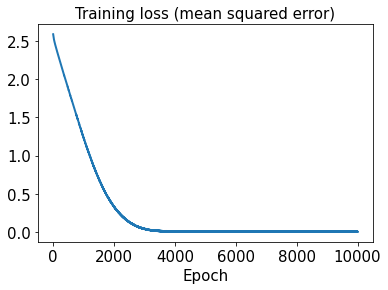

In [34]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

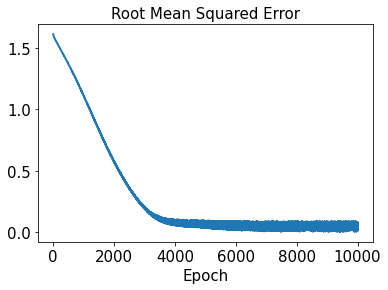

In [35]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [36]:
decoded_sensor_train2 = sensor_pred2.predict(t_train)

In [37]:
decoded_sensor_test2 = sensor_pred2.predict(t_test)

In [38]:
error_train_abs2 = np.abs(decoded_sensor_train2 - x_train2)

In [39]:
error_test_abs2 = np.abs(decoded_sensor_test2 - x_test2)

In [40]:
error_train_abs2

array([[[2.01062064e-01],
        [1.83414369e-01],
        [2.32853012e-01],
        [1.92267423e-01],
        [1.72356634e-01],
        [2.17826681e-01],
        [2.62164955e-01],
        [2.39534073e-01],
        [2.01880054e-01],
        [2.24067812e-01],
        [2.10596733e-01],
        [2.69220572e-01],
        [1.89434891e-01],
        [2.39238195e-01],
        [1.93657141e-01],
        [2.83339052e-01]],

       [[4.52533923e-01],
        [3.98681570e-01],
        [5.18435956e-01],
        [4.02001543e-01],
        [3.66419752e-01],
        [4.93174345e-01],
        [5.99245174e-01],
        [5.15938873e-01],
        [4.42658396e-01],
        [5.02509458e-01],
        [4.60600252e-01],
        [6.04380615e-01],
        [4.02633531e-01],
        [5.30273433e-01],
        [4.07229252e-01],
        [6.46825929e-01]],

       [[1.15810685e-01],
        [1.07489209e-01],
        [1.34859114e-01],
        [1.14754157e-01],
        [1.02081518e-01],
        [1.25088005e-01],
        

In [41]:
l2_error_sensor_train2 = np.sqrt(np.sum((decoded_sensor_train2 - x_train2)**2) / np.sum(x_train2**2))
print(l2_error_sensor_train2)

0.2338811934894113


In [42]:
l2_error_sensor_test2 = np.sqrt(np.sum((decoded_sensor_test2 - x_test2)**2) / np.sum(x_test2**2))
print(l2_error_sensor_test2)

0.3434960546774767


In [43]:
sensor_pred3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start3 = datetime.datetime.now()
history3 = sensor_pred3.fit(t_train, x_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 13ms/step - loss: 3.8567 - rmse: 1.9638
Epoch 2/10000
2/2 [==============================] - 0s 28ms/step - loss: 3.8459 - rmse: 1.9610
Epoch 3/10000
2/2 [==============================] - 0s 20ms/step - loss: 3.8367 - rmse: 1.9587
Epoch 4/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.8278 - rmse: 1.9564
Epoch 5/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.8198 - rmse: 1.9544
Epoch 6/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8116 - rmse: 1.9523
Epoch 7/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.8041 - rmse: 1.9503
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7965 - rmse: 1.9484
Epoch 9/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7892 - rmse: 1.9465
Epoch 10/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7823 - rmse: 1.9448
Epoch 11/10000
2/2 [======================

2/2 [==============================] - 0s 7ms/step - loss: 3.4782 - rmse: 1.8649
Epoch 87/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4746 - rmse: 1.8640
Epoch 88/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4712 - rmse: 1.8630
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4677 - rmse: 1.8621
Epoch 90/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4642 - rmse: 1.8612
Epoch 91/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4607 - rmse: 1.8602
Epoch 92/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4572 - rmse: 1.8593
Epoch 93/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4538 - rmse: 1.8584
Epoch 94/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4503 - rmse: 1.8574
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4469 - rmse: 1.8565
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 11ms/step - loss: 3.1961 - rmse: 1.7877
Epoch 171/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.1932 - rmse: 1.7869
Epoch 172/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1898 - rmse: 1.7859
Epoch 173/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1870 - rmse: 1.7851
Epoch 174/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.1839 - rmse: 1.7843
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1809 - rmse: 1.7834
Epoch 176/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1777 - rmse: 1.7825
Epoch 177/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.1750 - rmse: 1.7818
Epoch 178/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.1715 - rmse: 1.7808
Epoch 179/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1684 - rmse: 1.7799
Epoch 180/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 2.9531 - rmse: 1.7184
Epoch 255/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9511 - rmse: 1.7178
Epoch 256/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9475 - rmse: 1.7167
Epoch 257/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.9456 - rmse: 1.7162
Epoch 258/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9425 - rmse: 1.7153
Epoch 259/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.9394 - rmse: 1.7144
Epoch 260/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9364 - rmse: 1.7135
Epoch 261/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9339 - rmse: 1.7128
Epoch 262/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.9318 - rmse: 1.7122
Epoch 263/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.9285 - rmse: 1.7112
Epoch 264/10000
2/2 [===================

2/2 [==============================] - 0s 7ms/step - loss: 2.7344 - rmse: 1.6535
Epoch 339/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7316 - rmse: 1.6527
Epoch 340/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7293 - rmse: 1.6520
Epoch 341/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7267 - rmse: 1.6512
Epoch 342/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7245 - rmse: 1.6505
Epoch 343/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7221 - rmse: 1.6498
Epoch 344/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7200 - rmse: 1.6492
Epoch 345/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7170 - rmse: 1.6482
Epoch 346/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7147 - rmse: 1.6476
Epoch 347/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7122 - rmse: 1.6468
Epoch 348/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 2.5382 - rmse: 1.5931
Epoch 423/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5363 - rmse: 1.5925
Epoch 424/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5338 - rmse: 1.5917
Epoch 425/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5318 - rmse: 1.5911
Epoch 426/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5300 - rmse: 1.5905
Epoch 427/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5273 - rmse: 1.5897
Epoch 428/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5251 - rmse: 1.5890
Epoch 429/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5234 - rmse: 1.5884
Epoch 430/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5220 - rmse: 1.5880
Epoch 431/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5189 - rmse: 1.5870
Epoch 432/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 2.3611 - rmse: 1.5365
Epoch 507/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3588 - rmse: 1.5358
Epoch 508/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3573 - rmse: 1.5353
Epoch 509/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3553 - rmse: 1.5346
Epoch 510/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3532 - rmse: 1.5339
Epoch 511/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3507 - rmse: 1.5331
Epoch 512/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3494 - rmse: 1.5327
Epoch 513/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3474 - rmse: 1.5320
Epoch 514/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3447 - rmse: 1.5311
Epoch 515/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3427 - rmse: 1.5305
Epoch 516/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 2.1993 - rmse: 1.4829
Epoch 591/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1964 - rmse: 1.4819
Epoch 592/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1949 - rmse: 1.4814
Epoch 593/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1928 - rmse: 1.4807
Epoch 594/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1910 - rmse: 1.4801
Epoch 595/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1894 - rmse: 1.4796
Epoch 596/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1871 - rmse: 1.4788
Epoch 597/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.1850 - rmse: 1.4781
Epoch 598/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1831 - rmse: 1.4775
Epoch 599/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.1814 - rmse: 1.4769
Epoch 600/10000
2/2 [===================

2/2 [==============================] - 0s 9ms/step - loss: 2.0509 - rmse: 1.4320
Epoch 675/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0490 - rmse: 1.4314
Epoch 676/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0477 - rmse: 1.4309
Epoch 677/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0457 - rmse: 1.4302
Epoch 678/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0439 - rmse: 1.4295
Epoch 679/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0422 - rmse: 1.4290
Epoch 680/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0405 - rmse: 1.4284
Epoch 681/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0391 - rmse: 1.4279
Epoch 682/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0374 - rmse: 1.4273
Epoch 683/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0373 - rmse: 1.4272
Epoch 684/10000
2/2 [========================

2/2 [==============================] - 0s 9ms/step - loss: 1.9158 - rmse: 1.3840
Epoch 759/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9148 - rmse: 1.3837
Epoch 760/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9134 - rmse: 1.3832
Epoch 761/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9121 - rmse: 1.3827
Epoch 762/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9095 - rmse: 1.3818
Epoch 763/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9085 - rmse: 1.3814
Epoch 764/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9068 - rmse: 1.3808
Epoch 765/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9070 - rmse: 1.3809
Epoch 766/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9046 - rmse: 1.3800
Epoch 767/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9025 - rmse: 1.3792
Epoch 768/10000
2/2 [======================

2/2 [==============================] - 0s 7ms/step - loss: 1.7930 - rmse: 1.3389
Epoch 843/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7916 - rmse: 1.3384
Epoch 844/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7893 - rmse: 1.3375
Epoch 845/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7884 - rmse: 1.3372
Epoch 846/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7865 - rmse: 1.3365
Epoch 847/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7851 - rmse: 1.3360
Epoch 848/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7848 - rmse: 1.3358
Epoch 849/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7834 - rmse: 1.3353
Epoch 850/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7818 - rmse: 1.3347
Epoch 851/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7801 - rmse: 1.3341
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 1.6804 - rmse: 1.2962
Epoch 927/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6780 - rmse: 1.2953
Epoch 928/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6772 - rmse: 1.2949
Epoch 929/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6757 - rmse: 1.2944
Epoch 930/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6746 - rmse: 1.2940
Epoch 931/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6727 - rmse: 1.2932
Epoch 932/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6716 - rmse: 1.2928
Epoch 933/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6698 - rmse: 1.2921
Epoch 934/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6689 - rmse: 1.2917
Epoch 935/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6681 - rmse: 1.2915
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 11ms/step - loss: 1.5736 - rmse: 1.2543
Epoch 1011/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5724 - rmse: 1.2538
Epoch 1012/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5712 - rmse: 1.2534
Epoch 1013/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5700 - rmse: 1.2529
Epoch 1014/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5688 - rmse: 1.2524
Epoch 1015/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5682 - rmse: 1.2522
Epoch 1016/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5667 - rmse: 1.2516
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5660 - rmse: 1.2513
Epoch 1018/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5659 - rmse: 1.2513
Epoch 1019/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5629 - rmse: 1.2501
Epoch 1020/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 1.4776 - rmse: 1.2155
Epoch 1094/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4774 - rmse: 1.2154
Epoch 1095/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4752 - rmse: 1.2144
Epoch 1096/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4751 - rmse: 1.2144
Epoch 1097/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4740 - rmse: 1.2140
Epoch 1098/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4733 - rmse: 1.2137
Epoch 1099/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4714 - rmse: 1.2129
Epoch 1100/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4711 - rmse: 1.2128
Epoch 1101/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4699 - rmse: 1.2123
Epoch 1102/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4679 - rmse: 1.2115
Epoch 1103/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 1.3901 - rmse: 1.1789
Epoch 1177/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3885 - rmse: 1.1782
Epoch 1178/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3883 - rmse: 1.1781
Epoch 1179/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3862 - rmse: 1.1773
Epoch 1180/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3849 - rmse: 1.1767
Epoch 1181/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3839 - rmse: 1.1763
Epoch 1182/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.3829 - rmse: 1.1758
Epoch 1183/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3819 - rmse: 1.1754
Epoch 1184/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3819 - rmse: 1.1754
Epoch 1185/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3827 - rmse: 1.1758
Epoch 1186/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 1.3063 - rmse: 1.1428
Epoch 1260/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3064 - rmse: 1.1429
Epoch 1261/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3056 - rmse: 1.1425
Epoch 1262/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3045 - rmse: 1.1420
Epoch 1263/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3030 - rmse: 1.1414
Epoch 1264/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3015 - rmse: 1.1407
Epoch 1265/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3004 - rmse: 1.1402
Epoch 1266/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3001 - rmse: 1.1401
Epoch 1267/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2995 - rmse: 1.1398
Epoch 1268/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2977 - rmse: 1.1391
Epoch 1269/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 1.2288 - rmse: 1.1084
Epoch 1343/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2275 - rmse: 1.1078
Epoch 1344/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2267 - rmse: 1.1075
Epoch 1345/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2262 - rmse: 1.1072
Epoch 1346/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2237 - rmse: 1.1061
Epoch 1347/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2244 - rmse: 1.1064
Epoch 1348/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2220 - rmse: 1.1053
Epoch 1349/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2215 - rmse: 1.1051
Epoch 1350/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2215 - rmse: 1.1051
Epoch 1351/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2205 - rmse: 1.1046
Epoch 1352/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 1.1552 - rmse: 1.0747
Epoch 1426/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1544 - rmse: 1.0743
Epoch 1427/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1535 - rmse: 1.0739
Epoch 1428/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1527 - rmse: 1.0735
Epoch 1429/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1519 - rmse: 1.0731
Epoch 1430/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1522 - rmse: 1.0733
Epoch 1431/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1508 - rmse: 1.0726
Epoch 1432/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1510 - rmse: 1.0727
Epoch 1433/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1510 - rmse: 1.0727
Epoch 1434/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1486 - rmse: 1.0716
Epoch 1435/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 1.0920 - rmse: 1.0448
Epoch 1509/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0877 - rmse: 1.0428
Epoch 1510/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0869 - rmse: 1.0424
Epoch 1511/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0876 - rmse: 1.0428
Epoch 1512/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0879 - rmse: 1.0429
Epoch 1513/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0852 - rmse: 1.0416
Epoch 1514/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0843 - rmse: 1.0412
Epoch 1515/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0859 - rmse: 1.0419
Epoch 1516/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0822 - rmse: 1.0402
Epoch 1517/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0814 - rmse: 1.0398
Epoch 1518/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 1.0240 - rmse: 1.0118
Epoch 1592/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0252 - rmse: 1.0124
Epoch 1593/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0226 - rmse: 1.0111
Epoch 1594/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0222 - rmse: 1.0109
Epoch 1595/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0223 - rmse: 1.0110
Epoch 1596/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0219 - rmse: 1.0107
Epoch 1597/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0213 - rmse: 1.0105
Epoch 1598/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0196 - rmse: 1.0096
Epoch 1599/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0195 - rmse: 1.0096
Epoch 1600/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0180 - rmse: 1.0088
Epoch 1601/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.9654 - rmse: 0.9824
Epoch 1675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9646 - rmse: 0.9820
Epoch 1676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9668 - rmse: 0.9831
Epoch 1677/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9635 - rmse: 0.9814
Epoch 1678/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9654 - rmse: 0.9824
Epoch 1679/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9630 - rmse: 0.9812
Epoch 1680/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9624 - rmse: 0.9809
Epoch 1681/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9601 - rmse: 0.9797
Epoch 1682/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9597 - rmse: 0.9795
Epoch 1683/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9588 - rmse: 0.9790
Epoch 1684/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.9105 - rmse: 0.9540
Epoch 1758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9102 - rmse: 0.9539
Epoch 1759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9116 - rmse: 0.9546
Epoch 1760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9076 - rmse: 0.9525
Epoch 1761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9085 - rmse: 0.9530
Epoch 1762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9064 - rmse: 0.9519
Epoch 1763/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9053 - rmse: 0.9513
Epoch 1764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9055 - rmse: 0.9515
Epoch 1765/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9059 - rmse: 0.9516
Epoch 1766/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9047 - rmse: 0.9510
Epoch 1767/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.8565 - rmse: 0.9253
Epoch 1841/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8603 - rmse: 0.9274
Epoch 1842/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8567 - rmse: 0.9254
Epoch 1843/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8551 - rmse: 0.9246
Epoch 1844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8539 - rmse: 0.9239
Epoch 1845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8542 - rmse: 0.9241
Epoch 1846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8528 - rmse: 0.9233
Epoch 1847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8522 - rmse: 0.9230
Epoch 1848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8516 - rmse: 0.9227
Epoch 1849/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8529 - rmse: 0.9234
Epoch 1850/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.8066 - rmse: 0.8979
Epoch 1924/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8061 - rmse: 0.8977
Epoch 1925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8056 - rmse: 0.8974
Epoch 1926/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8060 - rmse: 0.8976
Epoch 1927/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8058 - rmse: 0.8975
Epoch 1928/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8037 - rmse: 0.8963
Epoch 1929/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8043 - rmse: 0.8966
Epoch 1930/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8019 - rmse: 0.8954
Epoch 1931/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8048 - rmse: 0.8970
Epoch 1932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8009 - rmse: 0.8948
Epoch 1933/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.7610 - rmse: 0.8722
Epoch 2007/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7606 - rmse: 0.8720
Epoch 2008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7594 - rmse: 0.8713
Epoch 2009/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7603 - rmse: 0.8718
Epoch 2010/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7579 - rmse: 0.8704
Epoch 2011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7612 - rmse: 0.8723
Epoch 2012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7565 - rmse: 0.8696
Epoch 2013/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7566 - rmse: 0.8696
Epoch 2014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7560 - rmse: 0.8693
Epoch 2015/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7552 - rmse: 0.8689
Epoch 2016/10000
2/2 [==========

2/2 [==============================] - 0s 7ms/step - loss: 0.7177 - rmse: 0.8470
Epoch 2090/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7135 - rmse: 0.8445
Epoch 2091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7141 - rmse: 0.8449
Epoch 2092/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7155 - rmse: 0.8457
Epoch 2093/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7123 - rmse: 0.8438
Epoch 2094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7113 - rmse: 0.8432
Epoch 2095/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7114 - rmse: 0.8433
Epoch 2096/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7102 - rmse: 0.8425
Epoch 2097/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7118 - rmse: 0.8435
Epoch 2098/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7098 - rmse: 0.8423
Epoch 2099/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.6739 - rmse: 0.8208
Epoch 2173/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6712 - rmse: 0.8191
Epoch 2174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6729 - rmse: 0.8201
Epoch 2175/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6714 - rmse: 0.8192
Epoch 2176/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6709 - rmse: 0.8189
Epoch 2177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6691 - rmse: 0.8178
Epoch 2178/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6693 - rmse: 0.8179
Epoch 2179/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6692 - rmse: 0.8179
Epoch 2180/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6701 - rmse: 0.8184
Epoch 2181/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6689 - rmse: 0.8177
Epoch 2182/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.6321 - rmse: 0.7949
Epoch 2256/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6367 - rmse: 0.7977
Epoch 2257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6317 - rmse: 0.7946
Epoch 2258/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6316 - rmse: 0.7945
Epoch 2259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6317 - rmse: 0.7946
Epoch 2260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6312 - rmse: 0.7943
Epoch 2261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6297 - rmse: 0.7934
Epoch 2262/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6288 - rmse: 0.7928
Epoch 2263/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6306 - rmse: 0.7940
Epoch 2264/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6329 - rmse: 0.7953
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 13ms/step - loss: 0.5938 - rmse: 0.7704
Epoch 2339/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5935 - rmse: 0.7702
Epoch 2340/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5915 - rmse: 0.7689
Epoch 2341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5919 - rmse: 0.7692
Epoch 2342/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5915 - rmse: 0.7689
Epoch 2343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5907 - rmse: 0.7684
Epoch 2344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5919 - rmse: 0.7692
Epoch 2345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5893 - rmse: 0.7675
Epoch 2346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5888 - rmse: 0.7671
Epoch 2347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5906 - rmse: 0.7683
Epoch 2348/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.5562 - rmse: 0.7456
Epoch 2422/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5594 - rmse: 0.7477
Epoch 2423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5575 - rmse: 0.7464
Epoch 2424/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5544 - rmse: 0.7444
Epoch 2425/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5541 - rmse: 0.7442
Epoch 2426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5559 - rmse: 0.7454
Epoch 2427/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5537 - rmse: 0.7439
Epoch 2428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5538 - rmse: 0.7440
Epoch 2429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5546 - rmse: 0.7445
Epoch 2430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5537 - rmse: 0.7439
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.5196 - rmse: 0.7206
Epoch 2505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5193 - rmse: 0.7204
Epoch 2506/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5243 - rmse: 0.7239
Epoch 2507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5195 - rmse: 0.7206
Epoch 2508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5187 - rmse: 0.7200
Epoch 2509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5188 - rmse: 0.7201
Epoch 2510/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5180 - rmse: 0.7195
Epoch 2511/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5214 - rmse: 0.7219
Epoch 2512/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5179 - rmse: 0.7194
Epoch 2513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5159 - rmse: 0.7181
Epoch 2514/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.4855 - rmse: 0.6965
Epoch 2588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4858 - rmse: 0.6968
Epoch 2589/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4832 - rmse: 0.6949
Epoch 2590/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4850 - rmse: 0.6962
Epoch 2591/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4844 - rmse: 0.6958
Epoch 2592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4815 - rmse: 0.6937
Epoch 2593/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4867 - rmse: 0.6975
Epoch 2594/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.4814 - rmse: 0.6937
Epoch 2595/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4814 - rmse: 0.6936
Epoch 2596/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4824 - rmse: 0.6944
Epoch 2597/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.4498 - rmse: 0.6705
Epoch 2671/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4484 - rmse: 0.6694
Epoch 2672/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4538 - rmse: 0.6734
Epoch 2673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4484 - rmse: 0.6694
Epoch 2674/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4472 - rmse: 0.6685
Epoch 2675/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4467 - rmse: 0.6682
Epoch 2676/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4500 - rmse: 0.6706
Epoch 2677/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4467 - rmse: 0.6682
Epoch 2678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4459 - rmse: 0.6675
Epoch 2679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4459 - rmse: 0.6675
Epoch 2680/10000
2/2 [============

2/2 [==============================] - 0s 11ms/step - loss: 0.4158 - rmse: 0.6446
Epoch 2754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4147 - rmse: 0.6437
Epoch 2755/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4151 - rmse: 0.6441
Epoch 2756/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4138 - rmse: 0.6430
Epoch 2757/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4147 - rmse: 0.6437
Epoch 2758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4137 - rmse: 0.6429
Epoch 2759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4179 - rmse: 0.6462
Epoch 2760/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4140 - rmse: 0.6432
Epoch 2761/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4132 - rmse: 0.6426
Epoch 2762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4140 - rmse: 0.6432
Epoch 2763/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.3822 - rmse: 0.6180
Epoch 2837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3819 - rmse: 0.6178
Epoch 2838/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3820 - rmse: 0.6179
Epoch 2839/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3809 - rmse: 0.6170
Epoch 2840/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.3827 - rmse: 0.6184
Epoch 2841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3821 - rmse: 0.6179
Epoch 2842/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3813 - rmse: 0.6173
Epoch 2843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3807 - rmse: 0.6168
Epoch 2844/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3852 - rmse: 0.6204
Epoch 2845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3815 - rmse: 0.6174
Epoch 2846/10000
2/2 [==========

2/2 [==============================] - 0s 11ms/step - loss: 0.3516 - rmse: 0.5927
Epoch 2920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3564 - rmse: 0.5967
Epoch 2921/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3515 - rmse: 0.5927
Epoch 2922/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3496 - rmse: 0.5911
Epoch 2923/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3488 - rmse: 0.5904
Epoch 2924/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3488 - rmse: 0.5904
Epoch 2925/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3480 - rmse: 0.5896
Epoch 2926/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3522 - rmse: 0.5932
Epoch 2927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3492 - rmse: 0.5907
Epoch 2928/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3521 - rmse: 0.5932
Epoch 2929/10000
2/2 [==========

2/2 [==============================] - 0s 7ms/step - loss: 0.3194 - rmse: 0.5649
Epoch 3003/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3179 - rmse: 0.5636
Epoch 3004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3203 - rmse: 0.5657
Epoch 3005/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3190 - rmse: 0.5645
Epoch 3006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3208 - rmse: 0.5661
Epoch 3007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3211 - rmse: 0.5664
Epoch 3008/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3182 - rmse: 0.5639
Epoch 3009/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3164 - rmse: 0.5623
Epoch 3010/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3160 - rmse: 0.5619
Epoch 3011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3173 - rmse: 0.5630
Epoch 3012/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.2924 - rmse: 0.5405
Epoch 3086/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2862 - rmse: 0.5347
Epoch 3087/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2866 - rmse: 0.5351
Epoch 3088/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2866 - rmse: 0.5351
Epoch 3089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2851 - rmse: 0.5337
Epoch 3090/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2889 - rmse: 0.5372
Epoch 3091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2852 - rmse: 0.5338
Epoch 3092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2845 - rmse: 0.5331
Epoch 3093/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2834 - rmse: 0.5321
Epoch 3094/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2851 - rmse: 0.5337
Epoch 3095/10000
2/2 [============

2/2 [==============================] - 0s 11ms/step - loss: 0.2588 - rmse: 0.5085
Epoch 3169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2569 - rmse: 0.5066
Epoch 3170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2560 - rmse: 0.5057
Epoch 3171/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2616 - rmse: 0.5113
Epoch 3172/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2555 - rmse: 0.5052
Epoch 3173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2560 - rmse: 0.5057
Epoch 3174/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2571 - rmse: 0.5068
Epoch 3175/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2573 - rmse: 0.5070
Epoch 3176/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2565 - rmse: 0.5062
Epoch 3177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2558 - rmse: 0.5055
Epoch 3178/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.2305 - rmse: 0.4799
Epoch 3252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2276 - rmse: 0.4768
Epoch 3253/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2273 - rmse: 0.4765
Epoch 3254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2301 - rmse: 0.4794
Epoch 3255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2318 - rmse: 0.4812
Epoch 3256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2285 - rmse: 0.4778
Epoch 3257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2271 - rmse: 0.4762
Epoch 3258/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2269 - rmse: 0.4761
Epoch 3259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2283 - rmse: 0.4775
Epoch 3260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2274 - rmse: 0.4766
Epoch 3261/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.2009 - rmse: 0.4479
Epoch 3335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2002 - rmse: 0.4472
Epoch 3336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2009 - rmse: 0.4479
Epoch 3337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2007 - rmse: 0.4478
Epoch 3338/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2018 - rmse: 0.4489
Epoch 3339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2013 - rmse: 0.4484
Epoch 3340/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1993 - rmse: 0.4462
Epoch 3341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1996 - rmse: 0.4464
Epoch 3342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1982 - rmse: 0.4449
Epoch 3343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2005 - rmse: 0.4475
Epoch 3344/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.1764 - rmse: 0.4197
Epoch 3418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1773 - rmse: 0.4208
Epoch 3419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1784 - rmse: 0.4220
Epoch 3420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1767 - rmse: 0.4201
Epoch 3421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1745 - rmse: 0.4174
Epoch 3422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1756 - rmse: 0.4187
Epoch 3423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1754 - rmse: 0.4185
Epoch 3424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1736 - rmse: 0.4163
Epoch 3425/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1758 - rmse: 0.4190
Epoch 3426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1758 - rmse: 0.4190
Epoch 3427/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.1529 - rmse: 0.3906
Epoch 3501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1514 - rmse: 0.3888
Epoch 3502/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1588 - rmse: 0.3981
Epoch 3503/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1523 - rmse: 0.3900
Epoch 3504/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1529 - rmse: 0.3907
Epoch 3505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1506 - rmse: 0.3878
Epoch 3506/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1520 - rmse: 0.3896
Epoch 3507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1571 - rmse: 0.3960
Epoch 3508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1508 - rmse: 0.3880
Epoch 3509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1494 - rmse: 0.3862
Epoch 3510/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.1297 - rmse: 0.3598
Epoch 3584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1295 - rmse: 0.3595
Epoch 3585/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1313 - rmse: 0.3619
Epoch 3586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1292 - rmse: 0.3591
Epoch 3587/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1285 - rmse: 0.3581
Epoch 3588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1331 - rmse: 0.3644
Epoch 3589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1356 - rmse: 0.3678
Epoch 3590/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1351 - rmse: 0.3673
Epoch 3591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1289 - rmse: 0.3587
Epoch 3592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1345 - rmse: 0.3663
Epoch 3593/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.1086 - rmse: 0.3291
Epoch 3667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1109 - rmse: 0.3327
Epoch 3668/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1081 - rmse: 0.3285
Epoch 3669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1103 - rmse: 0.3317
Epoch 3670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1135 - rmse: 0.3365
Epoch 3671/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1075 - rmse: 0.3275
Epoch 3672/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1088 - rmse: 0.3294
Epoch 3673/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1081 - rmse: 0.3284
Epoch 3674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1076 - rmse: 0.3276
Epoch 3675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1086 - rmse: 0.3291
Epoch 3676/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0935 - rmse: 0.3054
Epoch 3750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0910 - rmse: 0.3012
Epoch 3751/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0918 - rmse: 0.3025
Epoch 3752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0914 - rmse: 0.3019
Epoch 3753/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0934 - rmse: 0.3051
Epoch 3754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0981 - rmse: 0.3128
Epoch 3755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0901 - rmse: 0.2997
Epoch 3756/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0947 - rmse: 0.3074
Epoch 3757/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0896 - rmse: 0.2989
Epoch 3758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0917 - rmse: 0.3025
Epoch 3759/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0789 - rmse: 0.2804
Epoch 3833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0787 - rmse: 0.2801
Epoch 3834/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0754 - rmse: 0.2741
Epoch 3835/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0782 - rmse: 0.2791
Epoch 3836/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0751 - rmse: 0.2735
Epoch 3837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0781 - rmse: 0.2790
Epoch 3838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0782 - rmse: 0.2792
Epoch 3839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0762 - rmse: 0.2756
Epoch 3840/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0754 - rmse: 0.2741
Epoch 3841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0754 - rmse: 0.2742
Epoch 3842/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0617 - rmse: 0.2478
Epoch 3916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0645 - rmse: 0.2535
Epoch 3917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0633 - rmse: 0.2511
Epoch 3918/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0612 - rmse: 0.2470
Epoch 3919/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0627 - rmse: 0.2500
Epoch 3920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0628 - rmse: 0.2502
Epoch 3921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0622 - rmse: 0.2490
Epoch 3922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0621 - rmse: 0.2487
Epoch 3923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0644 - rmse: 0.2532
Epoch 3924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0606 - rmse: 0.2457
Epoch 3925/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0526 - rmse: 0.2287
Epoch 3999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0515 - rmse: 0.2263
Epoch 4000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0507 - rmse: 0.2247
Epoch 4001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0502 - rmse: 0.2234
Epoch 4002/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0524 - rmse: 0.2283
Epoch 4003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0531 - rmse: 0.2298
Epoch 4004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0508 - rmse: 0.2249
Epoch 4005/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0510 - rmse: 0.2254
Epoch 4006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0494 - rmse: 0.2217
Epoch 4007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0507 - rmse: 0.2246
Epoch 4008/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0438 - rmse: 0.2087
Epoch 4082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0430 - rmse: 0.2068
Epoch 4083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0424 - rmse: 0.2053
Epoch 4084/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0410 - rmse: 0.2019
Epoch 4085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0400 - rmse: 0.1994
Epoch 4086/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0426 - rmse: 0.2058
Epoch 4087/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0403 - rmse: 0.2002
Epoch 4088/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0395 - rmse: 0.1982
Epoch 4089/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0432 - rmse: 0.2072
Epoch 4090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0398 - rmse: 0.1988
Epoch 4091/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0351 - rmse: 0.1868
Epoch 4165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0328 - rmse: 0.1805
Epoch 4166/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0328 - rmse: 0.1805
Epoch 4167/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0341 - rmse: 0.1839
Epoch 4168/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0389 - rmse: 0.1967
Epoch 4169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0317 - rmse: 0.1773
Epoch 4170/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0377 - rmse: 0.1936
Epoch 4171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0330 - rmse: 0.1811
Epoch 4172/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0321 - rmse: 0.1784
Epoch 4173/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0350 - rmse: 0.1864
Epoch 4174/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0267 - rmse: 0.1628
Epoch 4248/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0259 - rmse: 0.1603
Epoch 4249/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0258 - rmse: 0.1598
Epoch 4250/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0271 - rmse: 0.1639
Epoch 4251/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0262 - rmse: 0.1613
Epoch 4252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0262 - rmse: 0.1610
Epoch 4253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0256 - rmse: 0.1592
Epoch 4254/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0280 - rmse: 0.1666
Epoch 4255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0282 - rmse: 0.1672
Epoch 4256/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0273 - rmse: 0.1646
Epoch 4257/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0217 - rmse: 0.1464
Epoch 4331/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0215 - rmse: 0.1460
Epoch 4332/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0202 - rmse: 0.1415
Epoch 4333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0239 - rmse: 0.1540
Epoch 4334/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0200 - rmse: 0.1407
Epoch 4335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0216 - rmse: 0.1463
Epoch 4336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0225 - rmse: 0.1492
Epoch 4337/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0205 - rmse: 0.1423
Epoch 4338/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0211 - rmse: 0.1443
Epoch 4339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0217 - rmse: 0.1466
Epoch 4340/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0192 - rmse: 0.1378
Epoch 4414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0180 - rmse: 0.1335
Epoch 4415/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0174 - rmse: 0.1312
Epoch 4416/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0174 - rmse: 0.1310
Epoch 4417/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0154 - rmse: 0.1231
Epoch 4418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0179 - rmse: 0.1329
Epoch 4419/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0193 - rmse: 0.1380
Epoch 4420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0190 - rmse: 0.1371
Epoch 4421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0165 - rmse: 0.1275
Epoch 4422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0164 - rmse: 0.1271
Epoch 4423/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0124 - rmse: 0.1104
Epoch 4497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0146 - rmse: 0.1200
Epoch 4498/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0118 - rmse: 0.1078
Epoch 4499/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0121 - rmse: 0.1090
Epoch 4500/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0114 - rmse: 0.1056
Epoch 4501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0114 - rmse: 0.1056
Epoch 4502/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0142 - rmse: 0.1181
Epoch 4503/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0113 - rmse: 0.1053
Epoch 4504/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0151 - rmse: 0.1221
Epoch 4505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0115 - rmse: 0.1064
Epoch 4506/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0106 - rmse: 0.1020
Epoch 4580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.0998
Epoch 4581/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0958
Epoch 4582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0996
Epoch 4583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - rmse: 0.1005
Epoch 4584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0108 - rmse: 0.1027
Epoch 4585/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0118 - rmse: 0.1076
Epoch 4586/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0101 - rmse: 0.0993
Epoch 4587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0954
Epoch 4588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0992
Epoch 4589/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0931
Epoch 4663/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0916
Epoch 4664/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0104 - rmse: 0.1011
Epoch 4665/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0846
Epoch 4666/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - rmse: 0.1009
Epoch 4667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.1007
Epoch 4668/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0146 - rmse: 0.1199
Epoch 4669/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0876
Epoch 4670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.1007
Epoch 4671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 4672/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0733
Epoch 4746/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0868
Epoch 4747/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0730
Epoch 4748/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0950
Epoch 4749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0139 - rmse: 0.1172
Epoch 4750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0728
Epoch 4751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0738
Epoch 4752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0727
Epoch 4753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0846
Epoch 4754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0925
Epoch 4755/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0864
Epoch 4829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0899
Epoch 4830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0879
Epoch 4831/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0666
Epoch 4832/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0740
Epoch 4833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0894
Epoch 4834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 4835/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0656
Epoch 4836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 4837/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0647
Epoch 4838/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0845
Epoch 4912/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0696
Epoch 4913/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0601
Epoch 4914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0580
Epoch 4915/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0939
Epoch 4916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0783
Epoch 4917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0842
Epoch 4918/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0762
Epoch 4919/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0597
Epoch 4920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 4921/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0514
Epoch 4995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0738
Epoch 4996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0737
Epoch 4997/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0699
Epoch 4998/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0509
Epoch 4999/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0567
Epoch 5000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0738
Epoch 5001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0526
Epoch 5002/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0502
Epoch 5003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 5004/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0620
Epoch 5078/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0109 - rmse: 0.1033
Epoch 5079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0682
Epoch 5080/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0639
Epoch 5081/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0639
Epoch 5082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0741
Epoch 5083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0606
Epoch 5084/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0576
Epoch 5085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0461
Epoch 5086/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0443
Epoch 5087/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0531
Epoch 5161/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0517
Epoch 5162/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0706
Epoch 5163/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0443
Epoch 5164/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0571
Epoch 5165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0760
Epoch 5166/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0901
Epoch 5167/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0104 - rmse: 0.1008
Epoch 5168/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0700
Epoch 5169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0435
Epoch 5170/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0527
Epoch 5244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0397
Epoch 5245/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0486
Epoch 5246/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0633
Epoch 5247/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0407
Epoch 5248/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0500
Epoch 5249/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0389
Epoch 5250/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0389
Epoch 5251/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0545
Epoch 5252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0103 - rmse: 0.1005
Epoch 5253/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0644
Epoch 5327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0716
Epoch 5328/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0665
Epoch 5329/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0352
Epoch 5330/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0401
Epoch 5331/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0644
Epoch 5332/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0383
Epoch 5333/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0507
Epoch 5334/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0507
Epoch 5335/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0691
Epoch 5336/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0660
Epoch 5410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0352
Epoch 5411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0497
Epoch 5412/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0393
Epoch 5413/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 5414/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0476
Epoch 5415/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0991
Epoch 5416/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0592
Epoch 5417/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 5418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0461
Epoch 5419/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0331
Epoch 5493/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0456
Epoch 5494/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0340
Epoch 5495/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0371
Epoch 5496/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0931
Epoch 5497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0984
Epoch 5498/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0349
Epoch 5499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0704
Epoch 5500/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0707
Epoch 5501/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0591
Epoch 5502/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0436
Epoch 5576/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 5577/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0674
Epoch 5578/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0353
Epoch 5579/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 5580/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 5581/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 5582/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0978
Epoch 5583/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0462
Epoch 5584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0520
Epoch 5585/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0445
Epoch 5659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0671
Epoch 5660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0371
Epoch 5661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0335
Epoch 5662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0653
Epoch 5663/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0409
Epoch 5664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0367
Epoch 5665/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0354
Epoch 5666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0319
Epoch 5667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0554
Epoch 5668/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0331
Epoch 5742/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0668
Epoch 5743/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0576
Epoch 5744/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0321
Epoch 5745/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0347
Epoch 5746/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 5747/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0711
Epoch 5748/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0526
Epoch 5749/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0436
Epoch 5750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0326
Epoch 5751/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0086 - rmse: 0.0916
Epoch 5825/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 5826/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0970
Epoch 5827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0606
Epoch 5828/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0486
Epoch 5829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0578
Epoch 5830/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 5831/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0306
Epoch 5832/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0624
Epoch 5833/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0077 - rmse: 0.0871
Epoch 5834/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0696
Epoch 5908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 5909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0512
Epoch 5910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0670
Epoch 5911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0500
Epoch 5912/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0510
Epoch 5913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0450
Epoch 5914/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0524
Epoch 5915/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0360
Epoch 5916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0802
Epoch 5917/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0597
Epoch 5991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0972
Epoch 5992/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0708
Epoch 5993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 5994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0572
Epoch 5995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0617
Epoch 5996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0426
Epoch 5997/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0357
Epoch 5998/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0296
Epoch 5999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0981
Epoch 6000/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 6074/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0618
Epoch 6075/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0981
Epoch 6076/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0468
Epoch 6077/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 6078/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0916
Epoch 6079/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0596
Epoch 6080/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0503
Epoch 6081/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0479
Epoch 6082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0855
Epoch 6083/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 6157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0692
Epoch 6158/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0324
Epoch 6159/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0300
Epoch 6160/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0708
Epoch 6161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0297
Epoch 6162/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 6163/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0644
Epoch 6164/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0917
Epoch 6165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 6166/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0311
Epoch 6240/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 6241/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0305
Epoch 6242/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0478
Epoch 6243/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0349
Epoch 6244/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0528
Epoch 6245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0984
Epoch 6246/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0863
Epoch 6247/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 6248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0319
Epoch 6249/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 6323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0518
Epoch 6324/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0315
Epoch 6325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0704
Epoch 6326/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0337
Epoch 6327/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 6328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0484
Epoch 6329/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0371
Epoch 6330/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0518
Epoch 6331/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 6332/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0485
Epoch 6406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0314
Epoch 6407/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0673
Epoch 6408/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0605
Epoch 6409/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0313
Epoch 6410/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0440
Epoch 6411/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 6412/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 6413/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0406
Epoch 6414/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 6415/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0646
Epoch 6489/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0503
Epoch 6490/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0623
Epoch 6491/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0526
Epoch 6492/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0477
Epoch 6493/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 6494/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 6495/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 6496/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 6497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0325
Epoch 6498/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0475
Epoch 6572/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0311
Epoch 6573/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0474
Epoch 6574/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0805
Epoch 6575/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0357
Epoch 6576/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 6577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0917
Epoch 6578/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0595
Epoch 6579/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0972
Epoch 6580/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0095 - rmse: 0.0970
Epoch 6581/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 6655/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0300
Epoch 6656/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0324
Epoch 6657/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0919
Epoch 6658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0302
Epoch 6659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0666
Epoch 6660/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0695
Epoch 6661/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 6662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0666
Epoch 6663/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 6664/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0862
Epoch 6738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 6739/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0532
Epoch 6740/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 6741/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0480
Epoch 6742/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0693
Epoch 6743/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 6744/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0308
Epoch 6745/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 6746/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0716
Epoch 6747/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0353
Epoch 6821/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.7440e-04 - rmse: 0.0293
Epoch 6822/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0639
Epoch 6823/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0397
Epoch 6824/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0859
Epoch 6825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0075 - rmse: 0.0857
Epoch 6826/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0970
Epoch 6827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0324
Epoch 6828/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 6829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 6830/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0343
Epoch 6904/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 6905/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0689
Epoch 6906/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0301
Epoch 6907/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0065 - rmse: 0.0802
Epoch 6908/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 6909/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 6910/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 6911/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0343
Epoch 6912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 6913/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 6987/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 6988/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0465
Epoch 6989/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0489
Epoch 6990/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 6991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0869
Epoch 6992/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0677
Epoch 6993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0487
Epoch 6994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 6995/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 6996/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0596
Epoch 7070/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0431
Epoch 7071/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0639
Epoch 7072/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0356
Epoch 7073/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 7074/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 7075/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0545
Epoch 7076/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 7077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 7078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 7079/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 7153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 7154/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 7155/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 7156/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 7157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 7158/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 7159/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 7160/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 7161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0475
Epoch 7162/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0706
Epoch 7235/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 7236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0342
Epoch 7237/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0467
Epoch 7238/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0858
Epoch 7239/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 7240/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0395
Epoch 7241/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0339
Epoch 7242/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 7243/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0446
Epoch 7244/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 7318/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0544
Epoch 7319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 7320/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7914e-04 - rmse: 0.0297
Epoch 7321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0424
Epoch 7322/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 7323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0422
Epoch 7324/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0506
Epoch 7325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 7326/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0506
Epoch 7327/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 7401/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5622e-04 - rmse: 0.0293
Epoch 7402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0340
Epoch 7403/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 7404/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0422
Epoch 7405/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0545
Epoch 7406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0445
Epoch 7407/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 7408/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 7409/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 7410/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 7484/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0434
Epoch 7485/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 7486/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0918
Epoch 7487/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 7488/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0597
Epoch 7489/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 7490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 7491/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0802
Epoch 7492/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 7493/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0713
Epoch 7567/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0645
Epoch 7568/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 7569/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 7570/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0860
Epoch 7571/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 7572/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 7573/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 7574/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 7575/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0981
Epoch 7576/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0532
Epoch 7650/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0921
Epoch 7651/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0342
Epoch 7652/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 7653/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0808
Epoch 7654/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 7655/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0653
Epoch 7656/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0097 - rmse: 0.0979
Epoch 7657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7658/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0676
Epoch 7659/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 7733/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0501
Epoch 7734/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 7735/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0597
Epoch 7736/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0600
Epoch 7737/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0923
Epoch 7738/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0919
Epoch 7739/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 7740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0599
Epoch 7741/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0710
Epoch 7742/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0676
Epoch 7816/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0582
Epoch 7817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 7818/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 7819/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0925
Epoch 7820/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0606
Epoch 7821/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 7822/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0809
Epoch 7823/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 7824/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 7825/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 7899/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0308
Epoch 7900/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 7901/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 7902/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 7903/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0528
Epoch 7904/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 7905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0805
Epoch 7906/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0434
Epoch 7907/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0482
Epoch 7908/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 7982/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 7983/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 7984/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 7985/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0549
Epoch 7986/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 7987/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 7988/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0501
Epoch 7989/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0313
Epoch 7990/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0501
Epoch 7991/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 8065/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 8066/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0086 - rmse: 0.0922
Epoch 8067/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 8068/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 8069/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0502
Epoch 8070/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 8071/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0974
Epoch 8072/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 8073/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 8074/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 8148/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 8149/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0087 - rmse: 0.0929
Epoch 8150/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 8151/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 8152/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0436
Epoch 8153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0436
Epoch 8154/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 8155/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 8156/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 8157/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 8231/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 8232/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8233/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0314
Epoch 8234/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 8235/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0641
Epoch 8236/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 8237/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0359
Epoch 8238/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.6735e-04 - rmse: 0.0298
Epoch 8239/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 8240/10000
2/2 [=====

2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 8313/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0521
Epoch 8314/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 8315/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3103e-04 - rmse: 0.0292
Epoch 8316/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 8317/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 8318/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0692
Epoch 8319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 8320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 8321/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 8322/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 8395/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 8396/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 8397/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0500
Epoch 8398/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 8399/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0574
Epoch 8400/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 8401/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9360e-04 - rmse: 0.0303
Epoch 8402/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0669
Epoch 8403/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0436
Epoch 8404/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 8478/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 8479/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 8480/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 8481/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 8482/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 8483/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 8484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0640
Epoch 8485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 8486/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0397
Epoch 8487/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 8561/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 8562/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 8563/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 8564/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0573
Epoch 8565/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0314
Epoch 8566/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 8567/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 8568/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 8569/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 8570/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 8644/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9456e-04 - rmse: 0.0304
Epoch 8645/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 8646/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.2322e-04 - rmse: 0.0292
Epoch 8647/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 8648/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 8649/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 8650/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 8651/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0857
Epoch 8652/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 8653/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 8727/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0716
Epoch 8728/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 8729/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 8730/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0817
Epoch 8731/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 8732/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 8733/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 8734/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 8735/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 8736/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0927
Epoch 8810/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0700
Epoch 8811/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 8812/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 8813/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 8814/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 8815/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0868
Epoch 8816/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 8817/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 8818/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0412
Epoch 8819/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 8893/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 8894/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 8895/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 8896/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 8897/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 8898/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0710
Epoch 8899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 8900/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 8901/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0521
Epoch 8902/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0914
Epoch 8975/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 8976/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 8977/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0912
Epoch 8978/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0854
Epoch 8979/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 8980/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 8981/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 8982/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 8983/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 8984/10000
2/2 [=========

Epoch 9057/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 9058/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 9059/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 9060/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 9061/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 9062/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 9063/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0618
Epoch 9064/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 9065/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 9066/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 9067/10

2/2 [==============================] - 0s 8ms/step - loss: 9.0774e-04 - rmse: 0.0291
Epoch 9140/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 9141/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 9142/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 9143/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0519
Epoch 9144/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8248e-04 - rmse: 0.0303
Epoch 9145/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8237e-04 - rmse: 0.0303
Epoch 9146/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0693
Epoch 9147/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 9148/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 9149/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 9222/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0521
Epoch 9223/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 9224/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0424
Epoch 9225/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0521
Epoch 9226/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 9227/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 9228/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 9229/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 9230/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0692
Epoch 9231/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 9305/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 9306/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 9307/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 9308/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7766e-04 - rmse: 0.0303
Epoch 9309/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 9310/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 9311/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 9312/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 9313/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 9314/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 9387/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 9388/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0308
Epoch 9389/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 9390/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 9391/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 9392/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 9393/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 9394/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 9395/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0695
Epoch 9396/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 9470/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1183e-04 - rmse: 0.0292
Epoch 9471/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 9472/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 9473/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 9474/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.6894e-04 - rmse: 0.0302
Epoch 9475/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.1253e-04 - rmse: 0.0292
Epoch 9476/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 9477/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0693
Epoch 9478/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 9479/10000
2

2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 9552/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 9553/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 9554/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 9555/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0663
Epoch 9556/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 9557/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0693
Epoch 9558/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 9559/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 9560/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 9561/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 9.9345e-04 - rmse: 0.0306
Epoch 9634/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 9635/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 9636/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 9637/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 9638/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 9639/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6587e-04 - rmse: 0.0302
Epoch 9640/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0802
Epoch 9641/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9642/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 9643/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 9716/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 9717/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 9718/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 9719/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.3687e-04 - rmse: 0.0297
Epoch 9720/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 9721/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 9722/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 9723/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0710
Epoch 9724/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2590e-04 - rmse: 0.0295
Epoch 9725/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0448
Epoch 9798/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8455e-04 - rmse: 0.0305
Epoch 9799/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 9800/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 9801/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 9802/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 9803/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 9804/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0801
Epoch 9805/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 9806/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 9807/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 9881/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 9882/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 9883/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 9884/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 9885/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 9886/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 9887/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0972
Epoch 9888/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0401
Epoch 9889/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0401
Epoch 9890/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 9963/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 9964/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 9965/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 9966/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 9967/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 9968/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 9969/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 9970/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0470
Epoch 9971/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 9972/10000
2/2 [========

In [45]:
time3_sensor = end3 - start3
print("Training time (Case 3, sensor prediction):", time3_sensor)

Training time (Case 3, sensor prediction): 0:03:37.660247


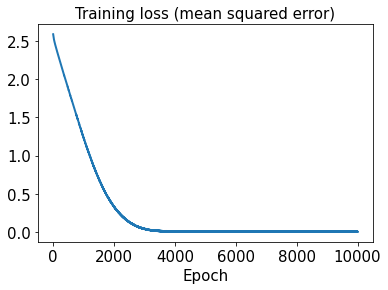

In [46]:
hist3 = history3.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

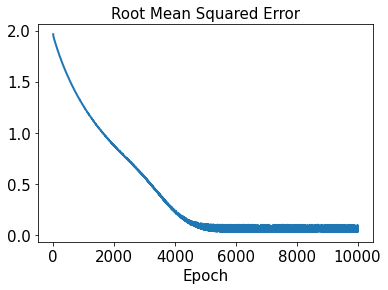

In [47]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
decoded_sensor_train3 = sensor_pred3.predict(t_train)

In [49]:
decoded_sensor_test3 = sensor_pred3.predict(t_test)

In [50]:
error_train_abs3 = np.abs(decoded_sensor_train3 - x_train3)

In [51]:
error_test_abs3 = np.abs(decoded_sensor_test3 - x_test3)

In [52]:
error_train_abs3

array([[[1.38765126e-01],
        [1.77349109e-01],
        [7.26811124e-02],
        [1.98222371e-01],
        [2.92394411e-02],
        [1.33881354e-01],
        [6.25991317e-02],
        [8.69142921e-02],
        [1.40486946e-01],
        [9.81846248e-02],
        [1.49009832e-01],
        [1.44579968e-01],
        [2.20163890e-01],
        [1.03556770e-01],
        [1.59042082e-01],
        [2.60804477e-01]],

       [[7.64959463e-02],
        [1.53154193e-01],
        [4.40042841e-02],
        [1.57504336e-01],
        [1.47308389e-02],
        [1.15333190e-01],
        [3.45757250e-02],
        [6.99813264e-02],
        [1.24650408e-01],
        [1.01029589e-01],
        [1.46725764e-01],
        [1.34174020e-01],
        [1.87727600e-01],
        [9.79617709e-02],
        [1.35015036e-01],
        [2.49407319e-01]],

       [[8.59181901e-02],
        [1.21510495e-01],
        [4.39184152e-02],
        [1.25738231e-01],
        [9.80132159e-03],
        [9.43332593e-02],
        

In [53]:
l2_error_sensor_train3 = np.sqrt(np.sum((decoded_sensor_train3 - x_train3)**2) / np.sum(x_train3**2))
print(l2_error_sensor_train3)

0.1501101847028603


In [54]:
l2_error_sensor_test3 = np.sqrt(np.sum((decoded_sensor_test3 - x_test3)**2) / np.sum(x_test3**2))
print(l2_error_sensor_test3)

0.1397989455796876
